# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Age

In [2]:
df = df_clean.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


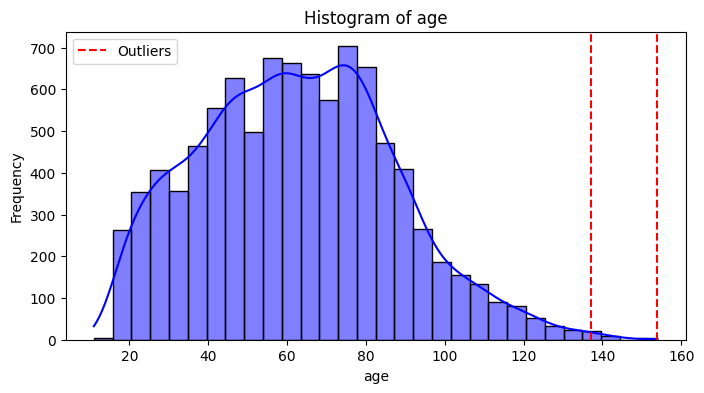

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1434
           1       0.82      0.91      0.86      1375

    accuracy                           0.86      2809
   macro avg       0.86      0.86      0.86      2809
weighted avg       0.86      0.86      0.86      2809

Node Labels:
 Annotation(0.631864, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3295.0, 3259.0]\nclass = 0')


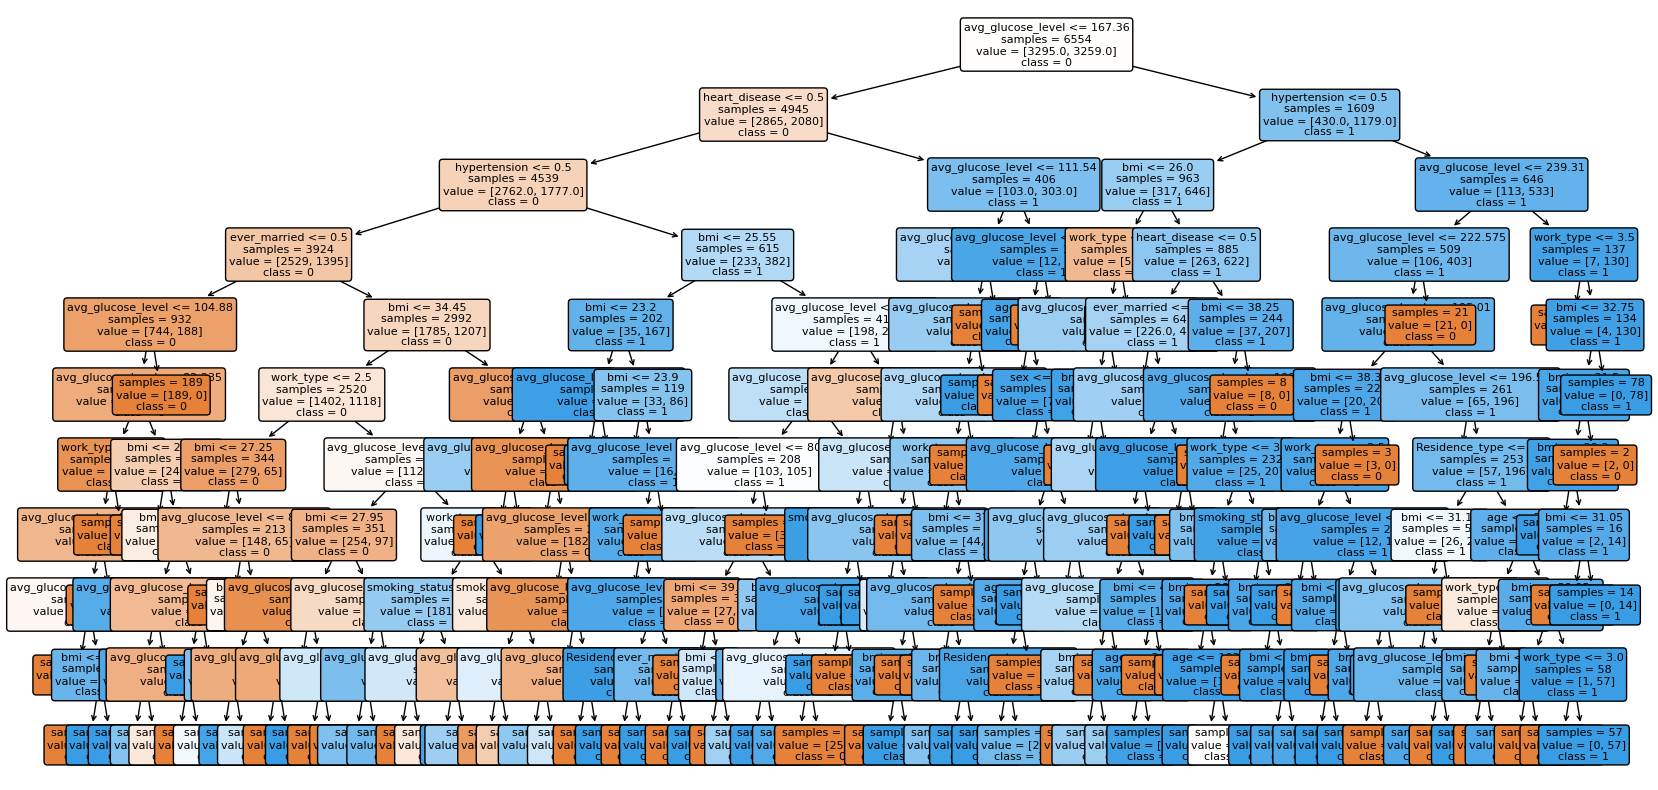

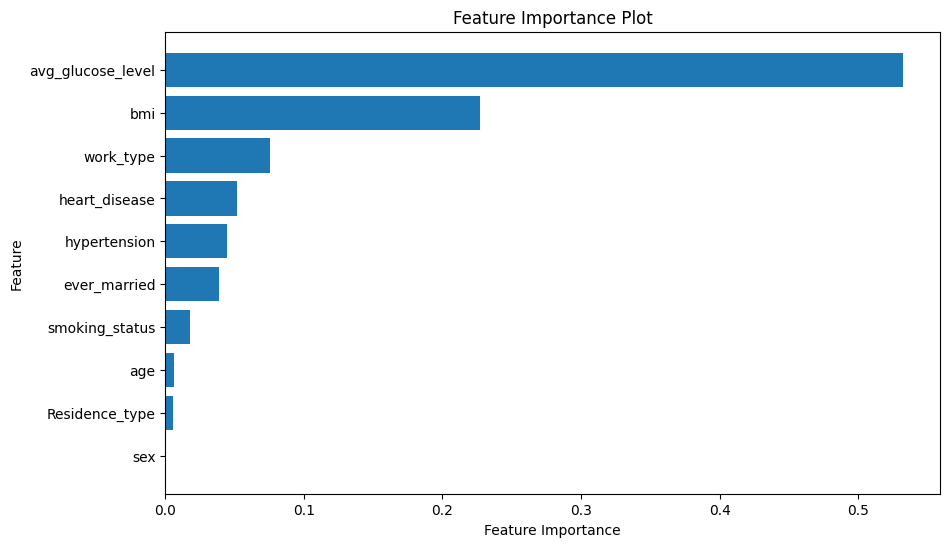

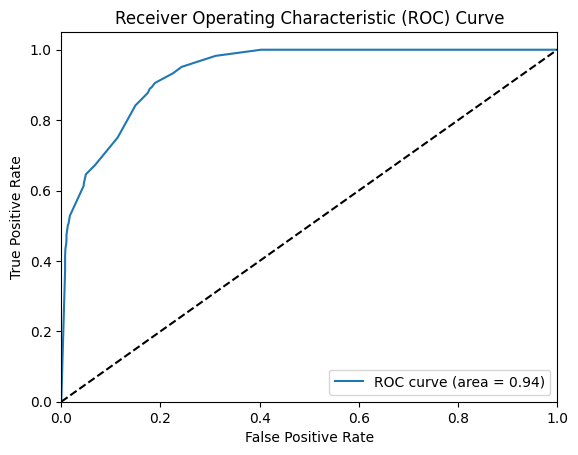

AUC Score: 0.9363806263471535


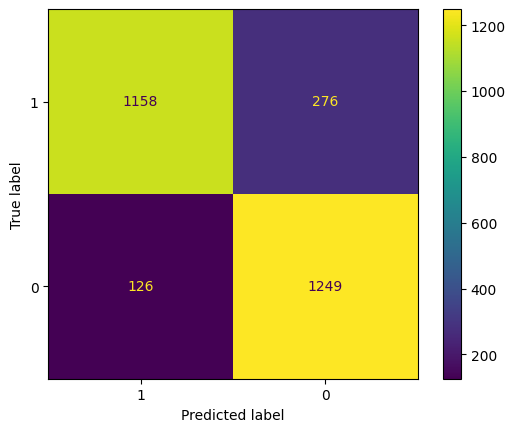

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7793594306049823, 0.8078291814946619, 0.8113879003558719, 0.7900355871886121, 0.8220640569395018, 0.8256227758007118, 0.797153024911032, 0.8078291814946619, 0.7829181494661922, 0.8392857142857143]
Mean accuracy: 0.8063485002541941
95% confidence interval: (0.792524073051325, 0.8201729274570633)


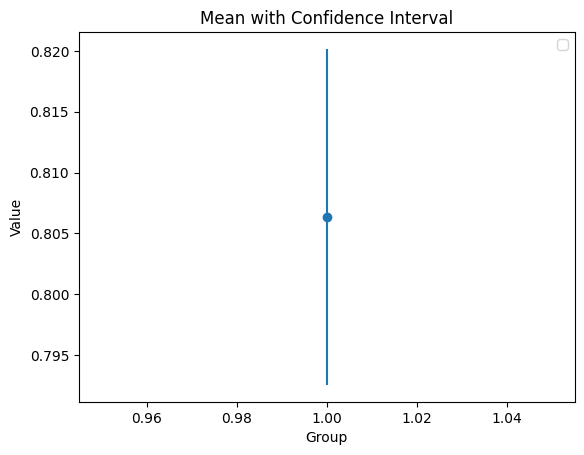

In [6]:
y_pred_prob_age_dt, y_test_age_dt, decision_tree = ML_algorithms.model_dt(df_age, df_clean)
mean_accuracy_dt_age, confidence_interval_dt_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1434
           1       0.87      0.91      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



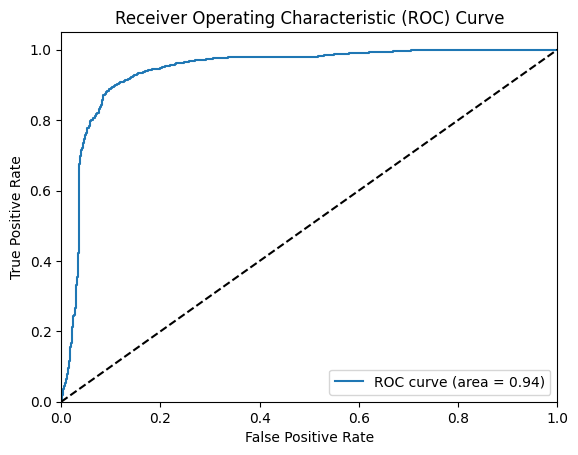

AUC Score: 0.9402003296563967


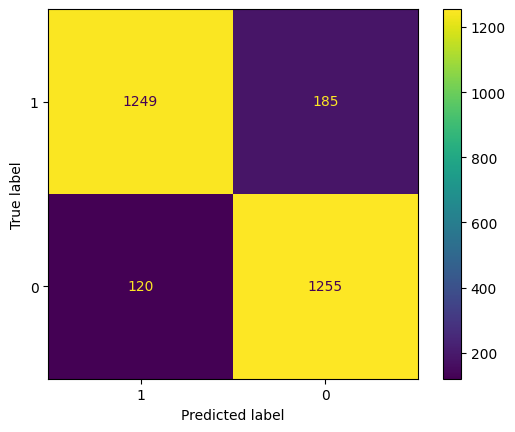

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy for each fold: [0.7900355871886121, 0.7793594306049823, 0.7437722419928826, 0.7900355871886121, 0.7508896797153025, 0.8042704626334519, 0.7793594306049823, 0.7508896797153025, 0.797153024911032, 0.7428571428571429]
Mean accuracy: 0.7728622267412304
95% confidence interval: (0.7560637503008992, 0.7896607031815616)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


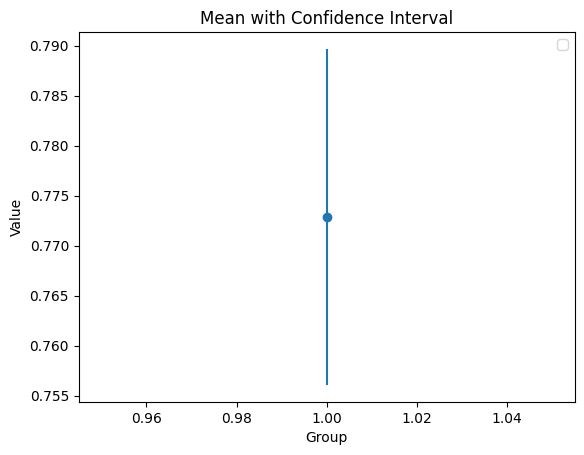

In [7]:
y_pred_prob_age_svm, y_test_age_svm, svm = ML_algorithms.model_svm(df_age, df_clean)
mean_accuracy_svm_age, confidence_interval_svm_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_age, 'age')

Outliers found:


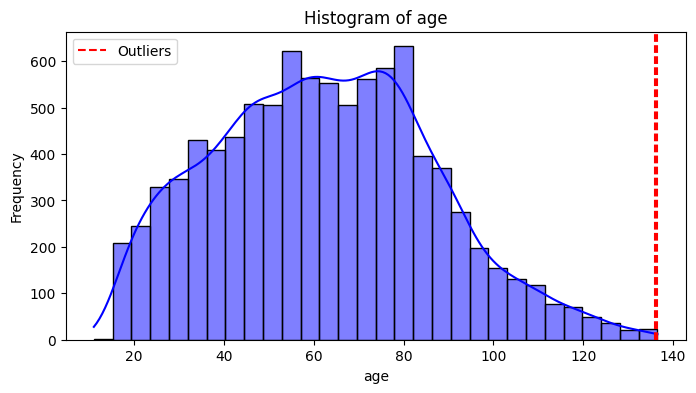

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1434
           1       0.82      0.91      0.86      1375

    accuracy                           0.86      2809
   macro avg       0.86      0.86      0.86      2809
weighted avg       0.86      0.86      0.86      2809

Node Labels:
 Annotation(0.631864, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3295.0, 3259.0]\nclass = 0')


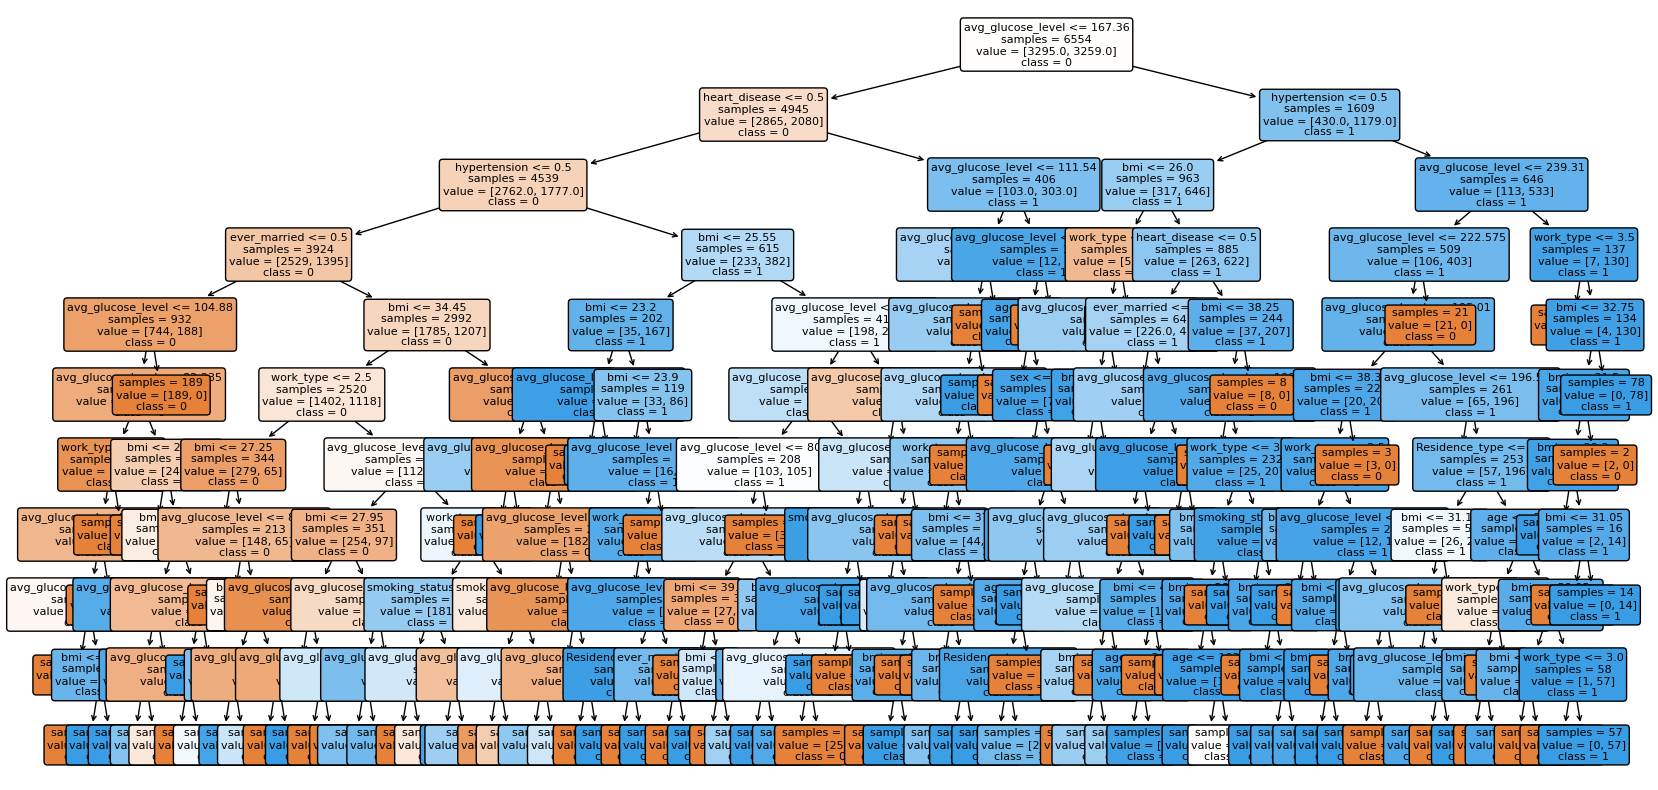

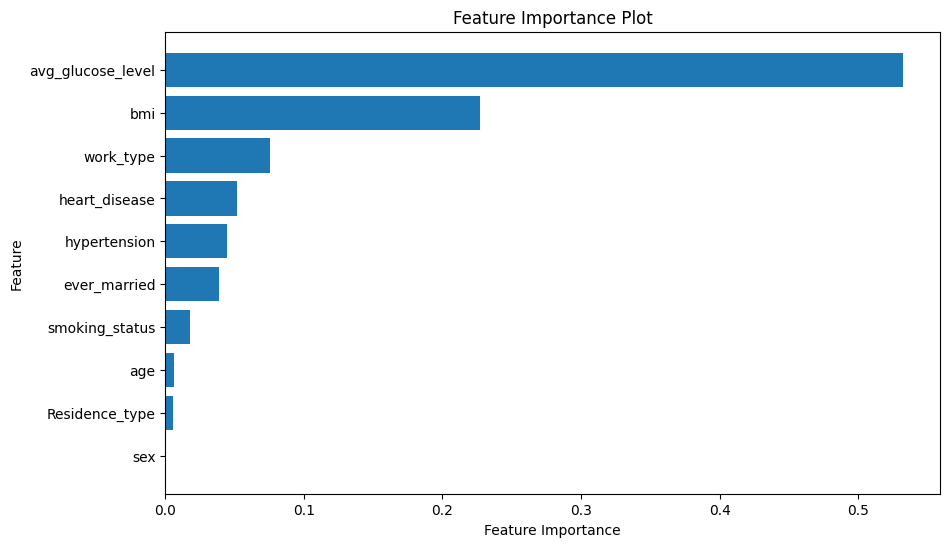

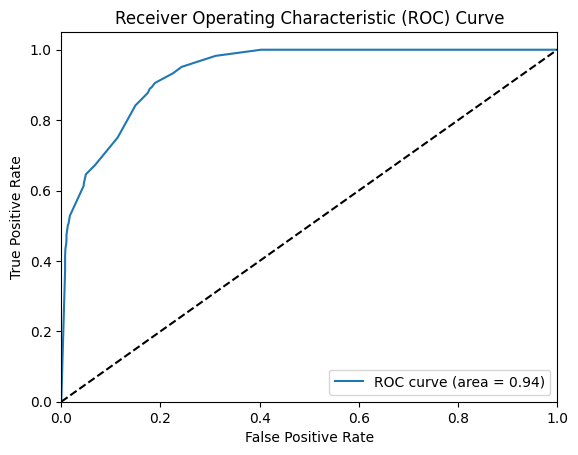

AUC Score: 0.9363806263471535


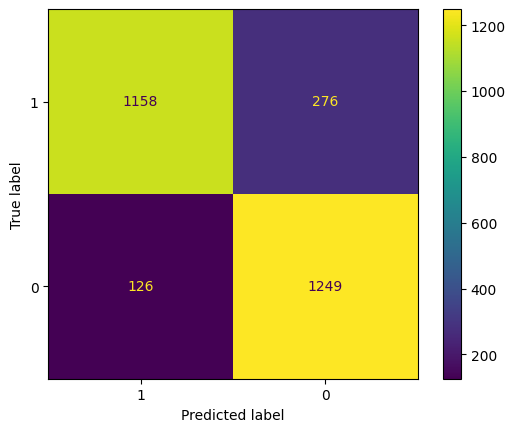

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8149466192170819, 0.8078291814946619, 0.8256227758007118, 0.8434163701067615, 0.8505338078291815, 0.8220640569395018, 0.8362989323843416, 0.8185053380782918, 0.8825622775800712, 0.8178571428571428]
Mean accuracy: 0.8319636502287748
95% confidence interval: (0.8160651005637877, 0.847862199893762)


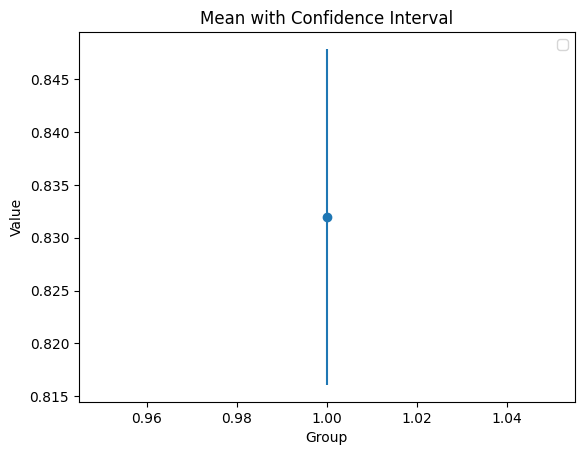

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_clean)
mean_accuracy_dt_20_age, confidence_interval_dt_20_age = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1434
           1       0.87      0.91      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



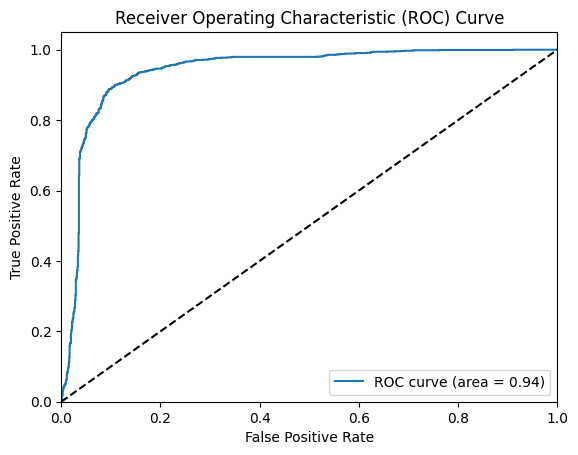

AUC Score: 0.9405038671231141


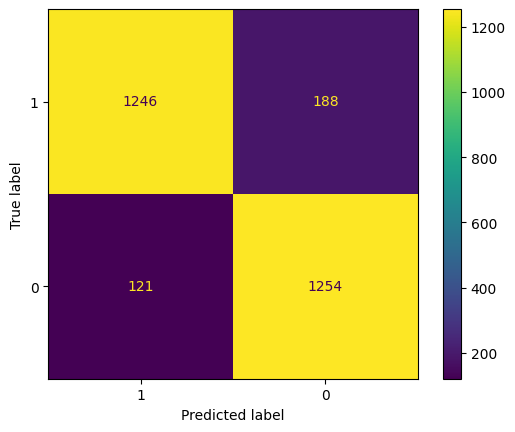

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7722419928825622, 0.8185053380782918, 0.7580071174377224, 0.7473309608540926, 0.7722419928825622, 0.7829181494661922, 0.7473309608540926, 0.7864768683274022, 0.7864768683274022, 0.7785714285714286]
Mean accuracy: 0.7750101677681749
95% confidence interval: (0.759803854264431, 0.7902164812719188)


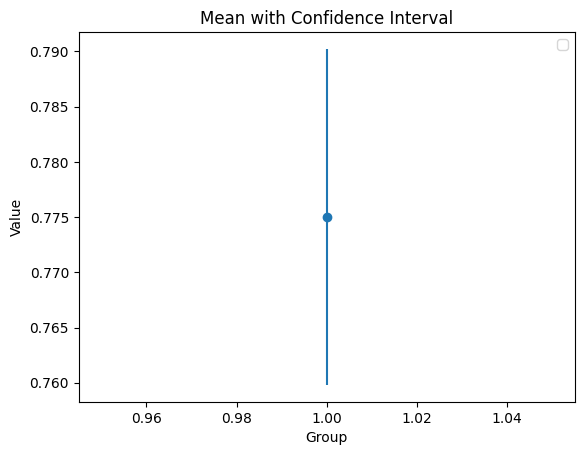

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_clean)
mean_accuracy_svm_20_age, confidence_interval_svm_20_age = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_clean.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


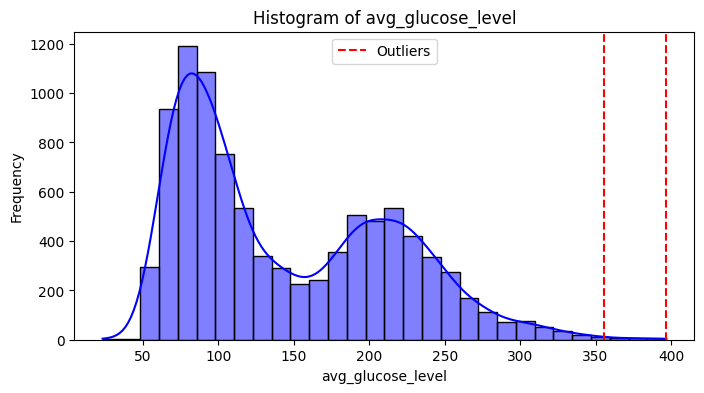

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1434
           1       0.80      0.84      0.82      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809

Node Labels:
 Annotation(0.556316, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3318, 3236]\nclass = 0')


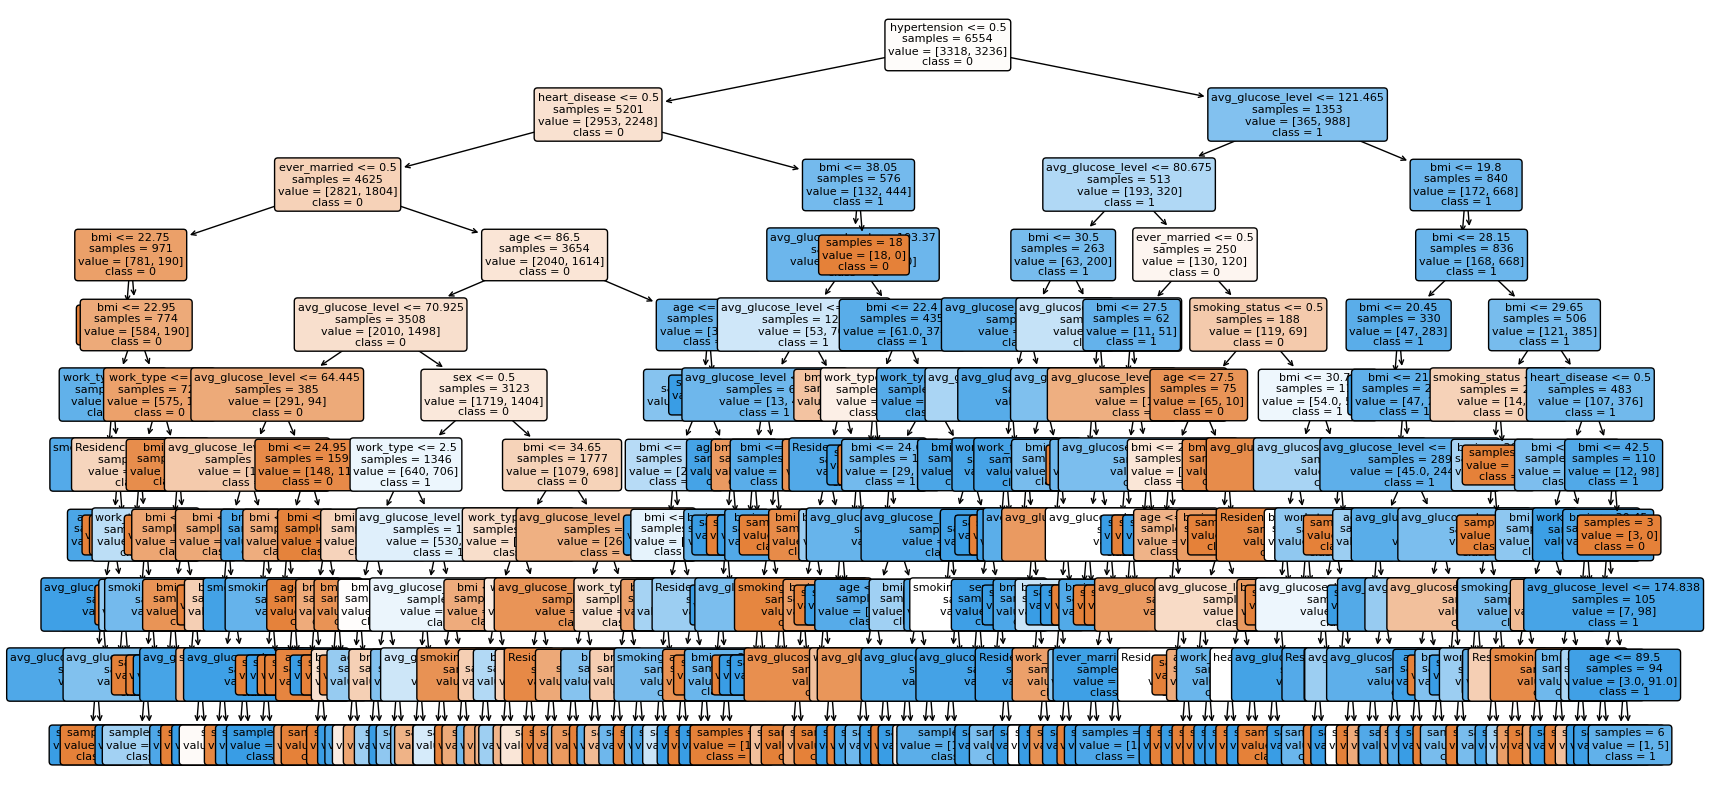

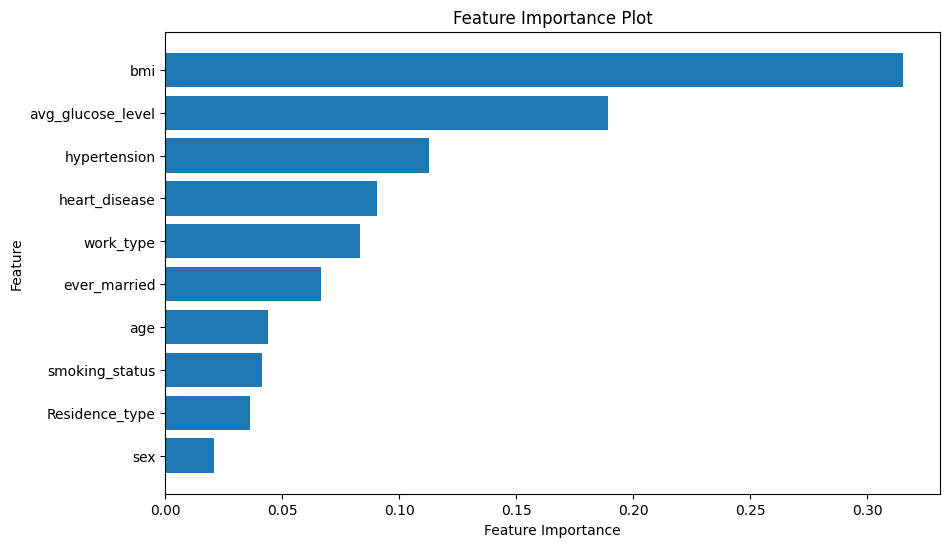

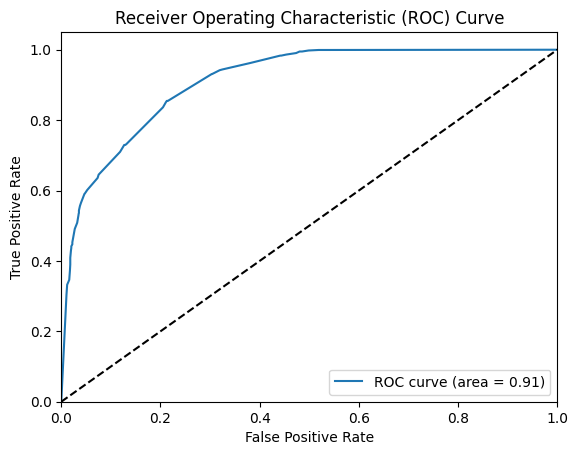

AUC Score: 0.9104967668314949


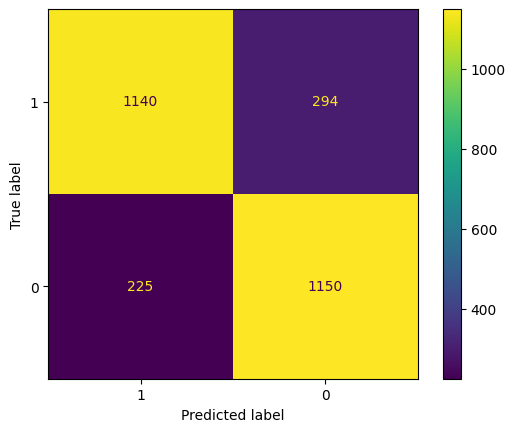

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.8185053380782918, 0.797153024911032, 0.800711743772242, 0.7793594306049823, 0.900355871886121, 0.8220640569395018, 0.8398576512455516, 0.7793594306049823, 0.8392857142857143]
Mean accuracy: 0.819515760040671
95% confidence interval: (0.7940258362442411, 0.8450056838371008)


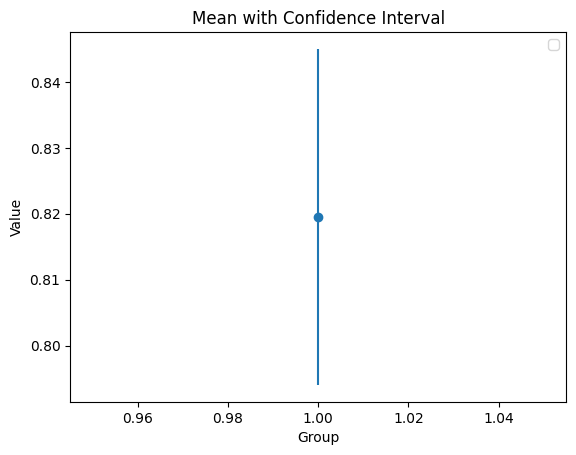

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, decision_tree = ML_algorithms.model_dt(df_glucose, df_clean)
mean_accuracy_dt_glucose, confidence_interval_dt_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1434
           1       0.80      0.82      0.81      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809



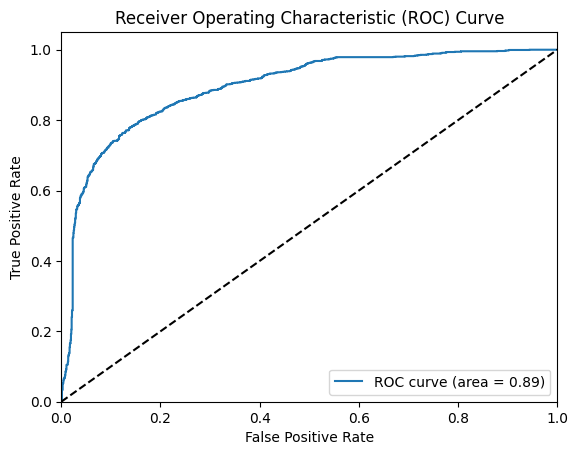

AUC Score: 0.8940030429821225


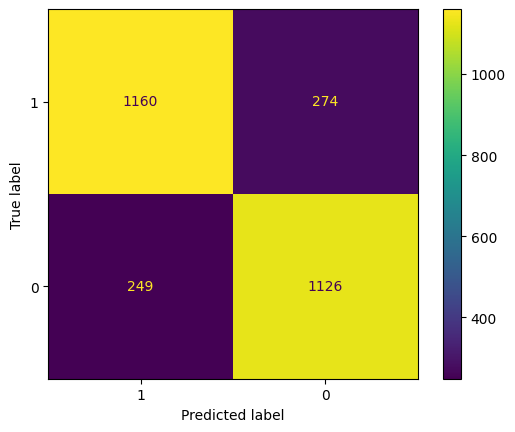

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8042704626334519, 0.7615658362989324, 0.7722419928825622, 0.7829181494661922, 0.7615658362989324, 0.7722419928825622, 0.7793594306049823, 0.8042704626334519, 0.7864768683274022, 0.7285714285714285]
Mean accuracy: 0.7753482460599898
95% confidence interval: (0.7594280831554127, 0.7912684089645668)


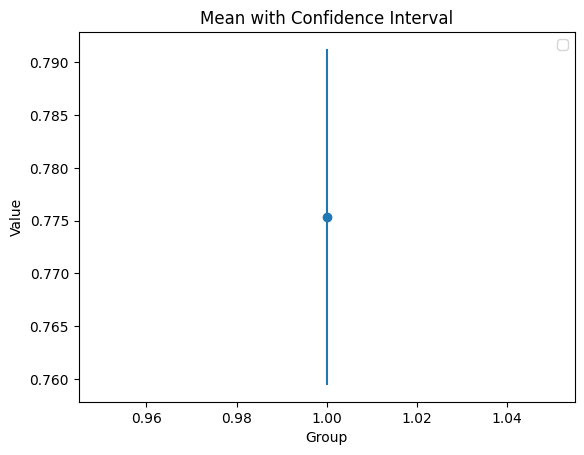

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, svm = ML_algorithms.model_svm(df_glucose, df_clean)
mean_accuracy_svm_glucose, confidence_interval_svm_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_glucose, 'avg_glucose_level')

Outliers found:


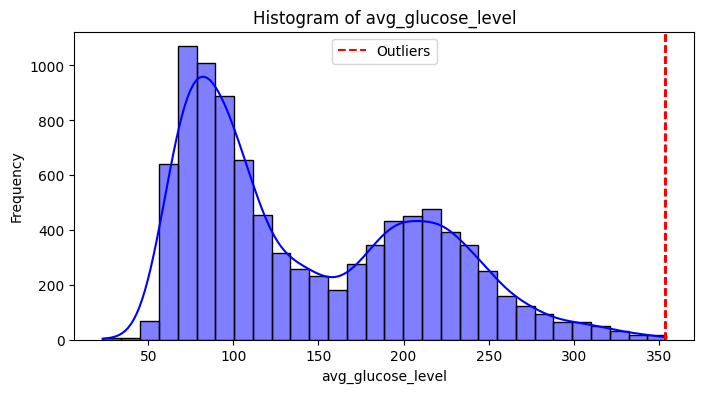

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1434
           1       0.79      0.83      0.81      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809

Node Labels:
 Annotation(0.621308, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3318, 3236]\nclass = 0')


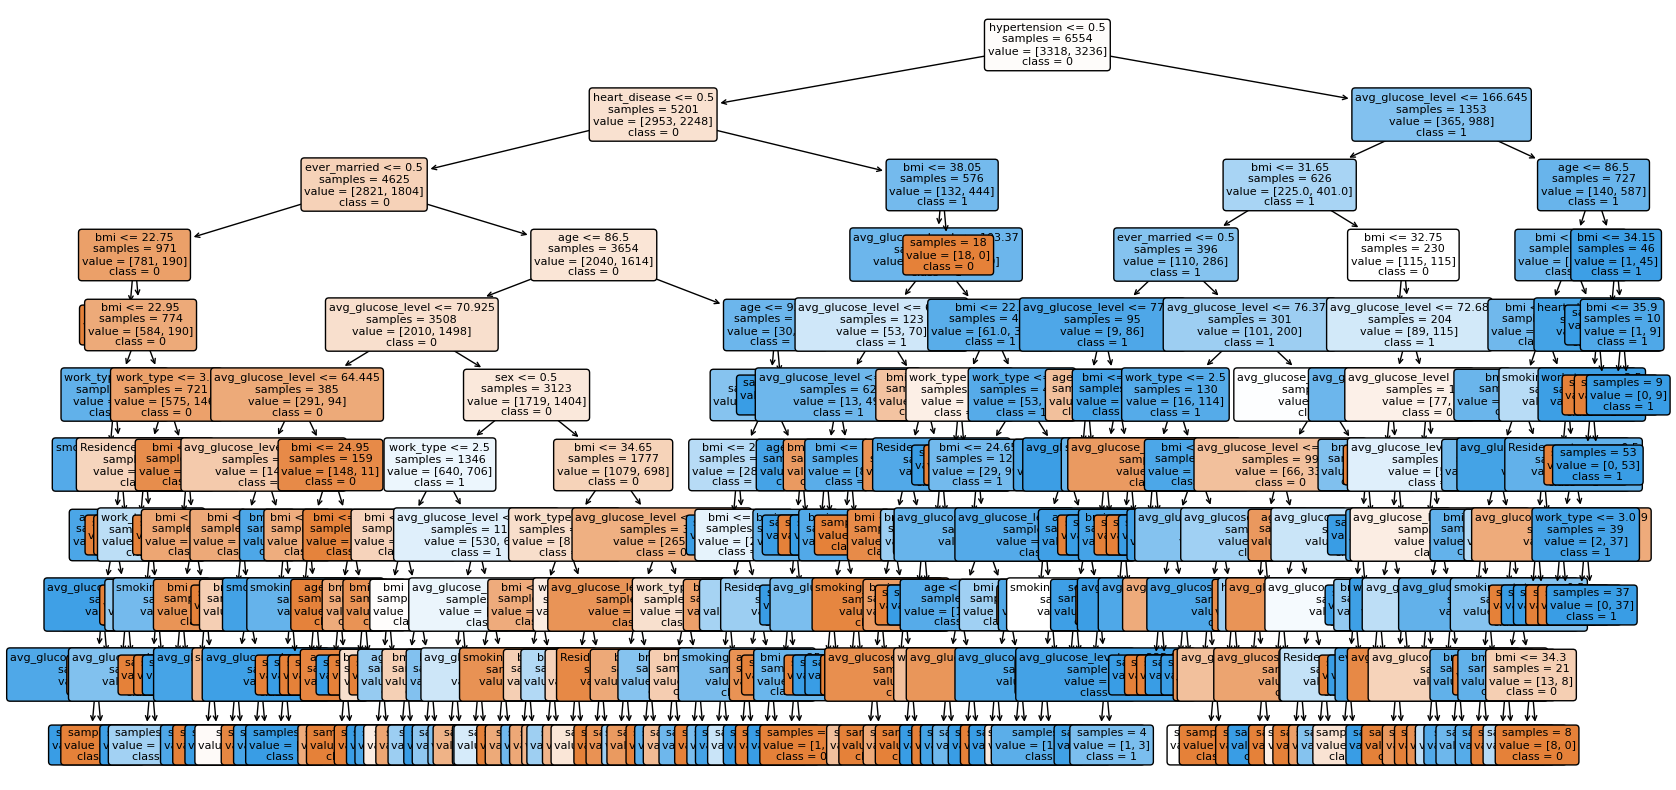

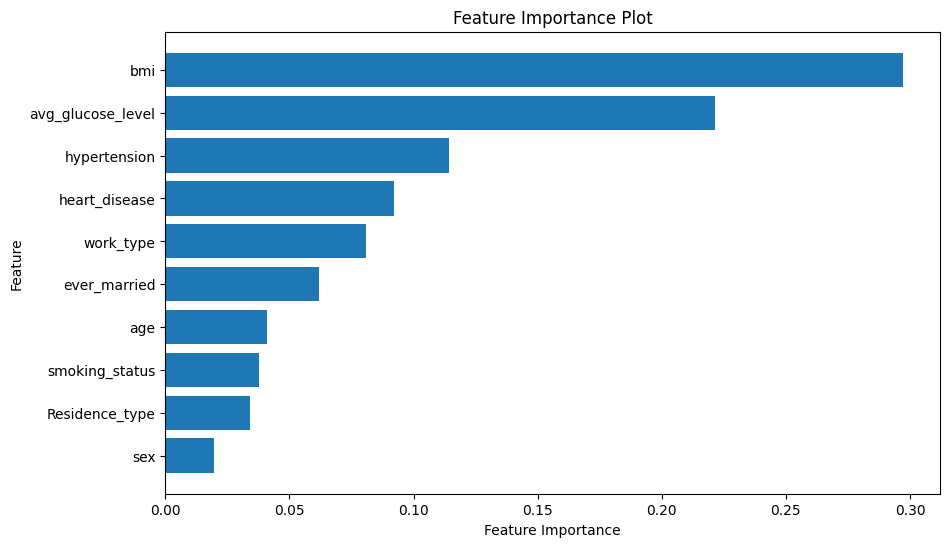

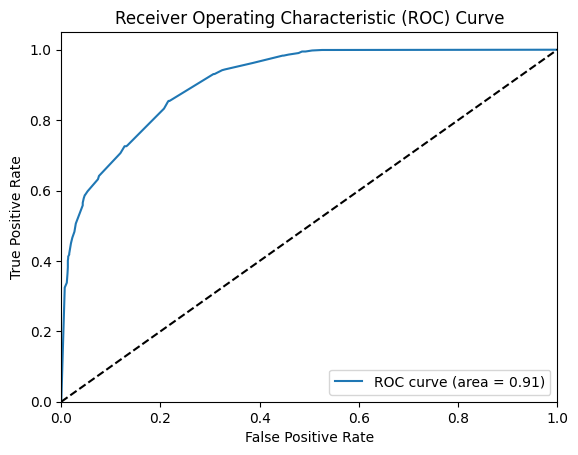

AUC Score: 0.9099677951058704


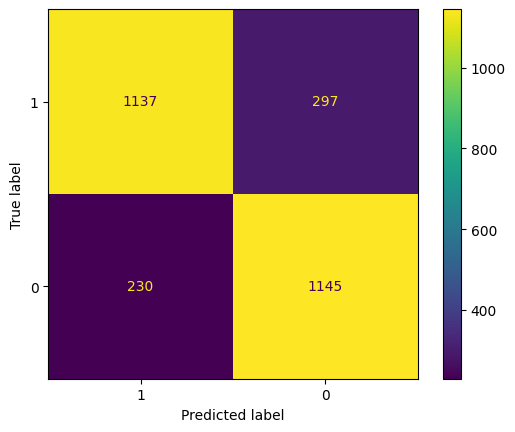

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8291814946619217, 0.8185053380782918, 0.797153024911032, 0.8505338078291815, 0.8185053380782918, 0.8362989323843416, 0.7722419928825622, 0.8505338078291815, 0.8220640569395018, 0.8071428571428572]
Mean accuracy: 0.8202160650737165
95% confidence interval: (0.8030359762841893, 0.8373961538632436)


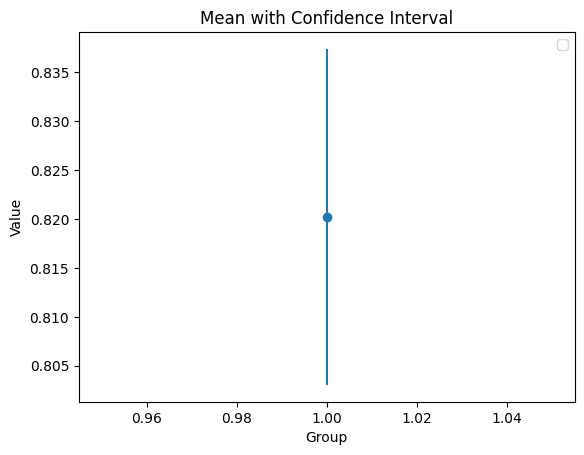

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_clean)
mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1434
           1       0.81      0.82      0.81      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809



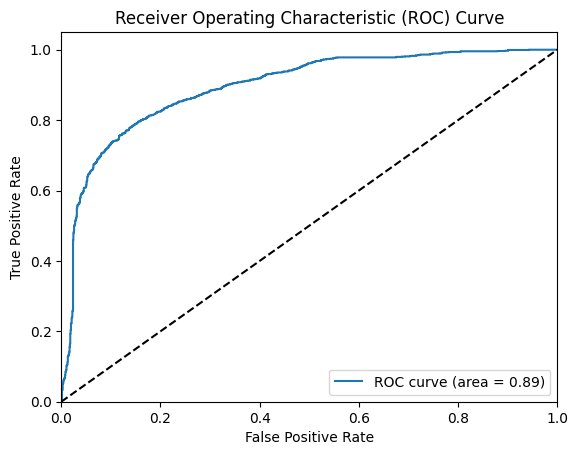

AUC Score: 0.8938496259667807


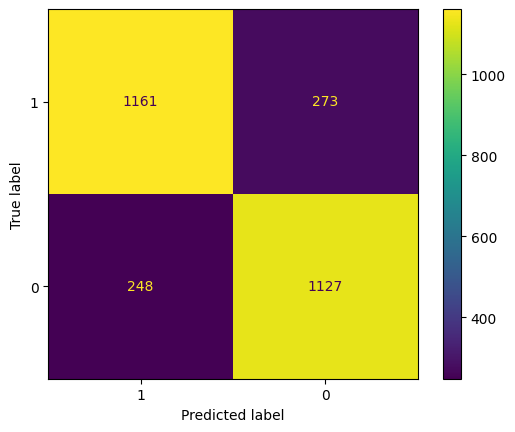

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7758007117437722, 0.7829181494661922, 0.7829181494661922, 0.7793594306049823, 0.7615658362989324, 0.7402135231316725, 0.7686832740213523, 0.7508896797153025, 0.7758007117437722, 0.775]
Mean accuracy: 0.7693149466192171
95% confidence interval: (0.7591024293318542, 0.7795274639065799)


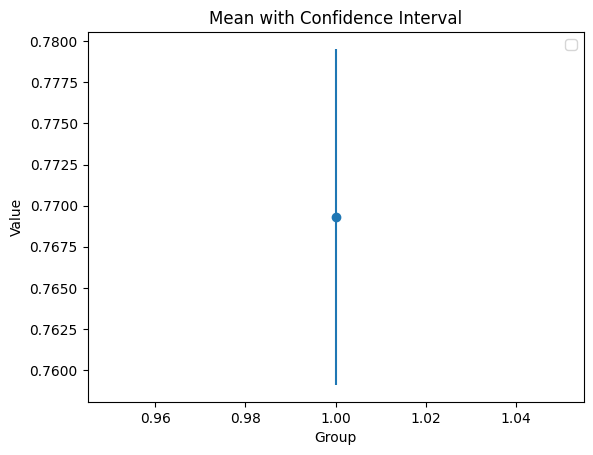

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_clean)
mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## bmi

In [22]:
df = df_clean.copy()

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

--------------------------------------
no outliers detected


In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


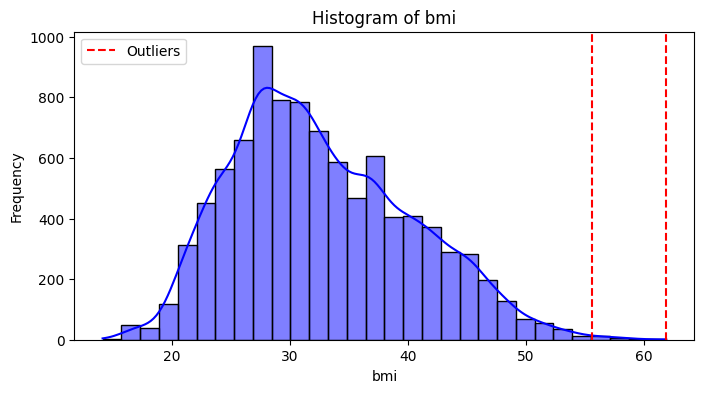

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1434
           1       0.83      0.80      0.82      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809

Node Labels:
 Annotation(0.571909, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3298.0, 3256.0]\nclass = 0')


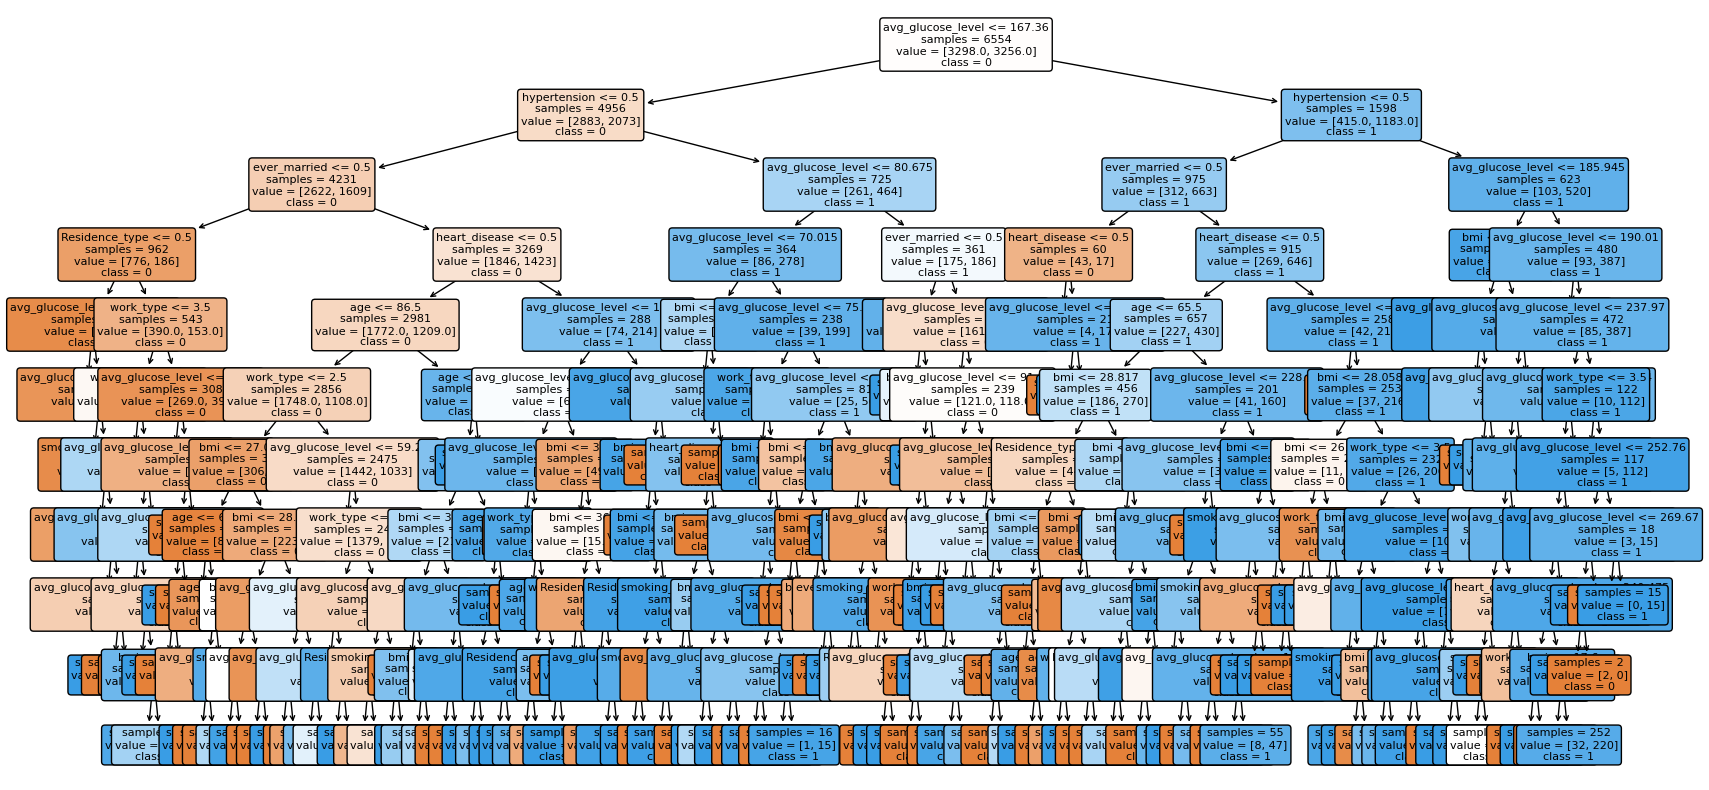

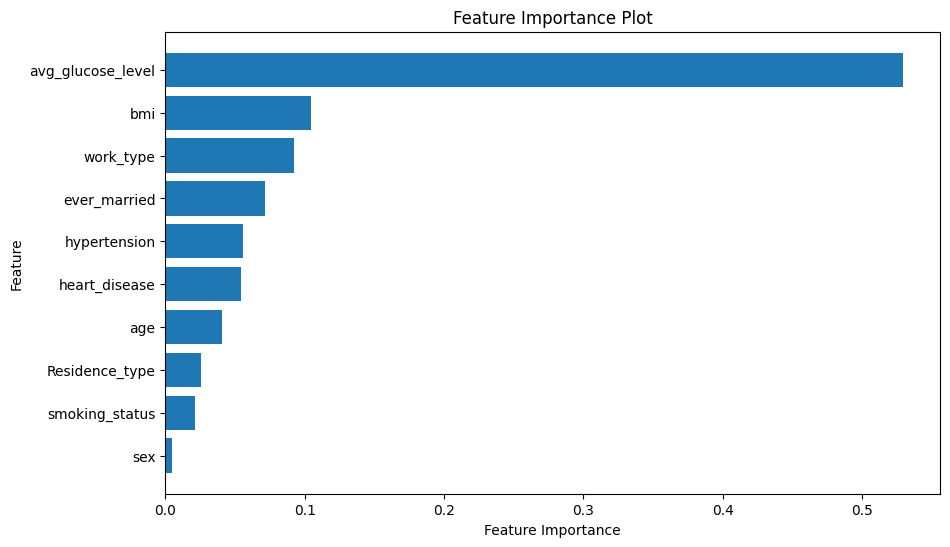

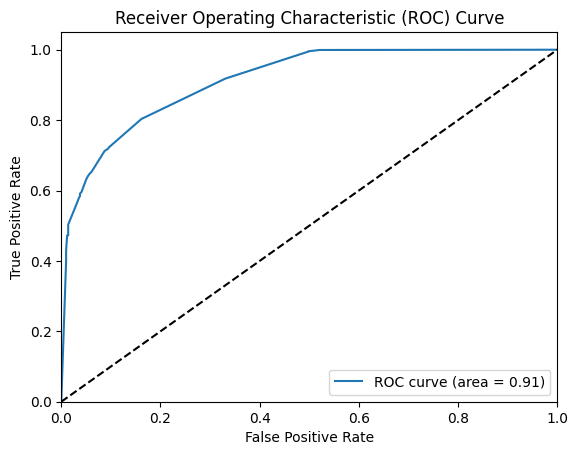

AUC Score: 0.9128966653987576


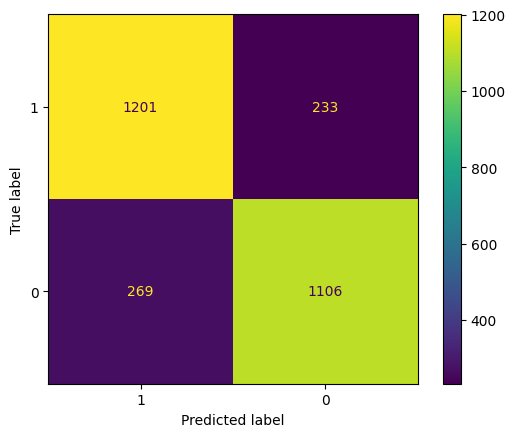

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.8327402135231317, 0.800711743772242, 0.8291814946619217, 0.8469750889679716, 0.8220640569395018, 0.8327402135231317, 0.8220640569395018, 0.8113879003558719, 0.8357142857142857]
Mean accuracy: 0.8252084392475851
95% confidence interval: (0.8157625929107002, 0.8346542855844701)


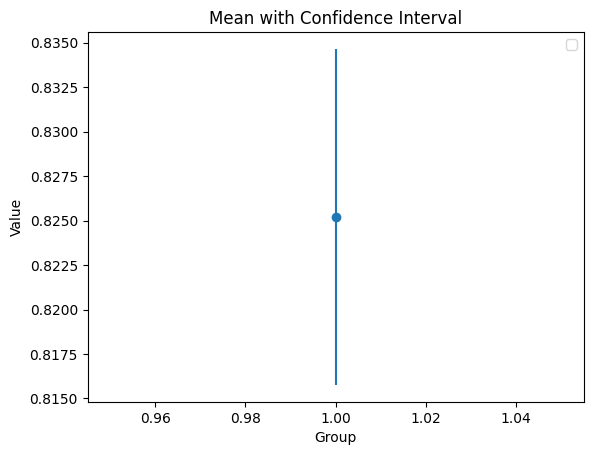

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, decision_tree = ML_algorithms.model_dt(df_bmi, df_clean)
mean_accuracy_dt_bmi, confidence_interval_dt_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector MAchine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1434
           1       0.84      0.87      0.85      1375

    accuracy                           0.85      2809
   macro avg       0.85      0.85      0.85      2809
weighted avg       0.85      0.85      0.85      2809



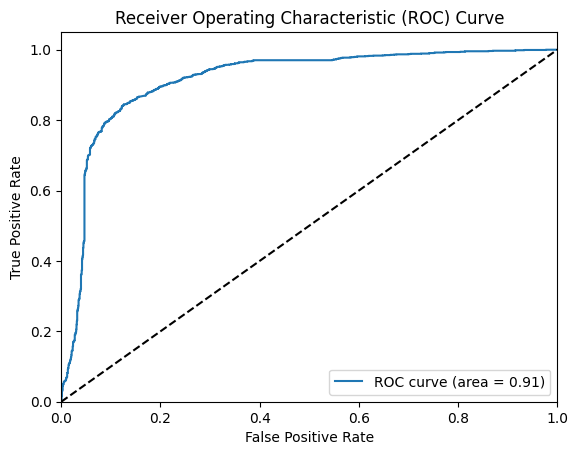

AUC Score: 0.9134796500570559


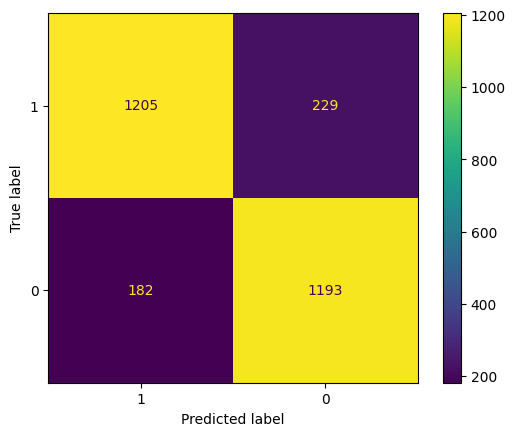

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7686832740213523, 0.7473309608540926, 0.7722419928825622, 0.7829181494661922, 0.797153024911032, 0.7900355871886121, 0.7864768683274022, 0.7651245551601423, 0.7473309608540926, 0.8]
Mean accuracy: 0.775729537366548
95% confidence interval: (0.7622256775152132, 0.7892333972178829)


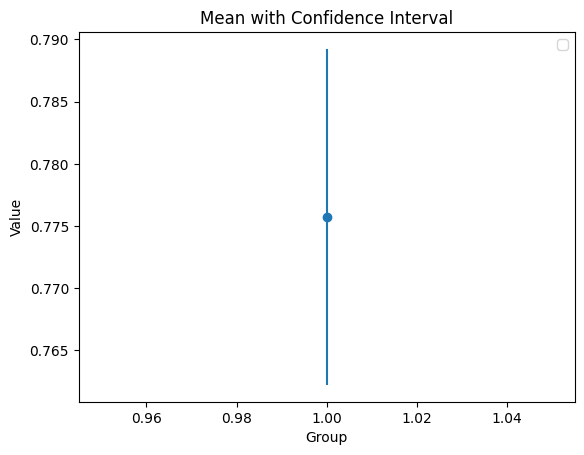

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, svm = ML_algorithms.model_svm(df_bmi, df_clean)
mean_accuracy_svm_bmi, confidence_interval_svm_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_bmi, 'bmi')

Outliers found:


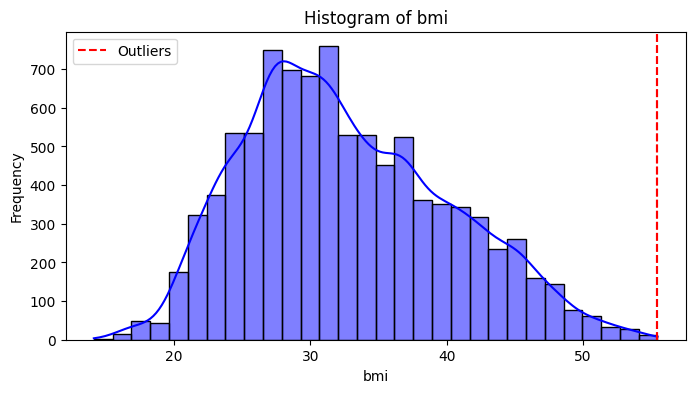

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1434
           1       0.83      0.80      0.81      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809

Node Labels:
 Annotation(0.576258, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3298.0, 3256.0]\nclass = 0')


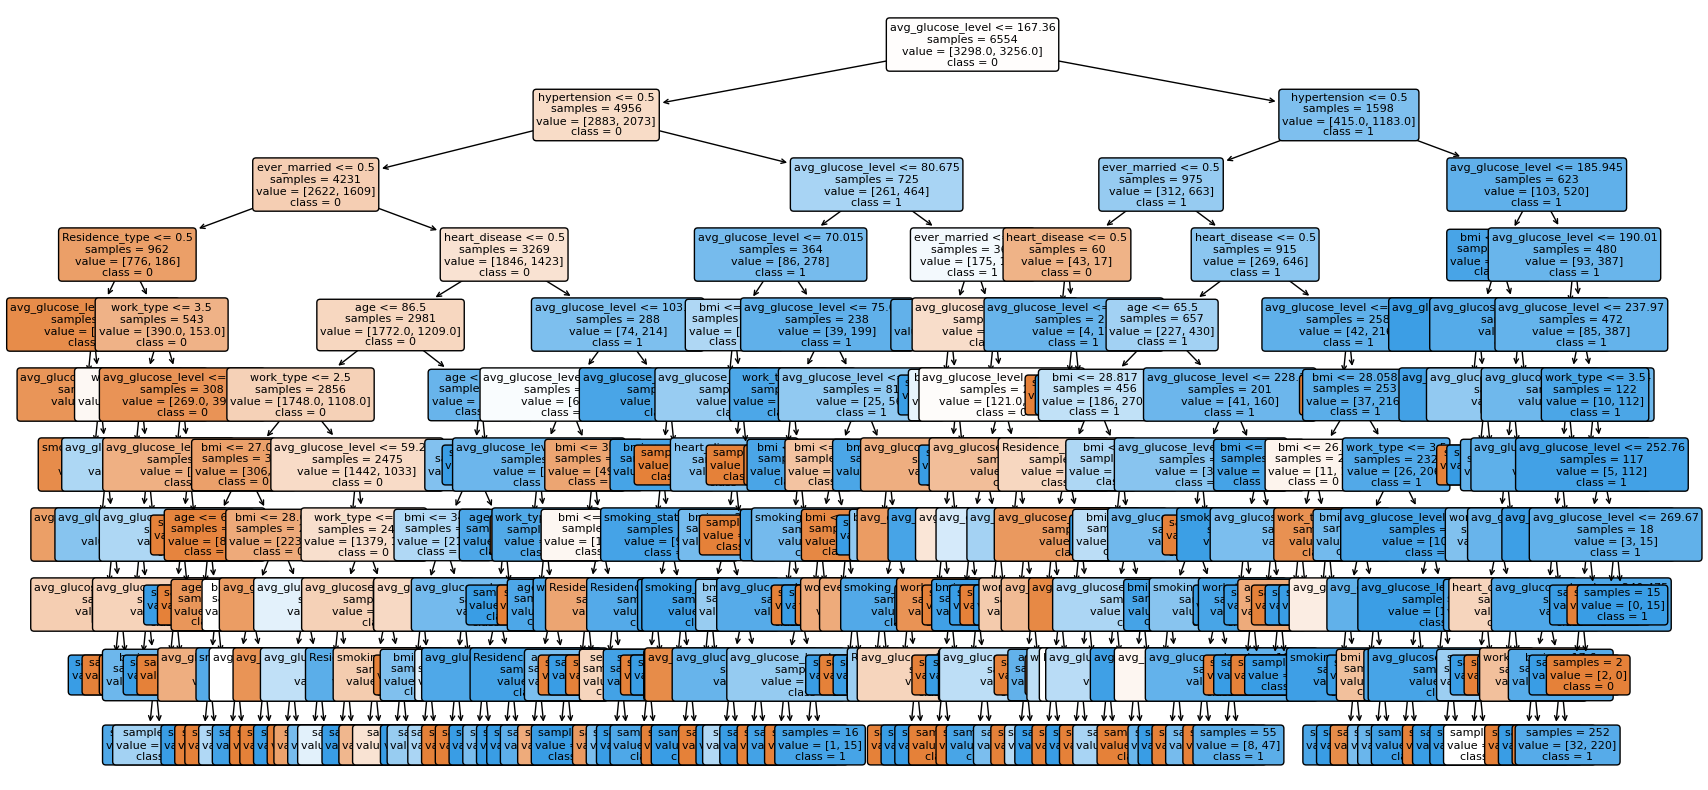

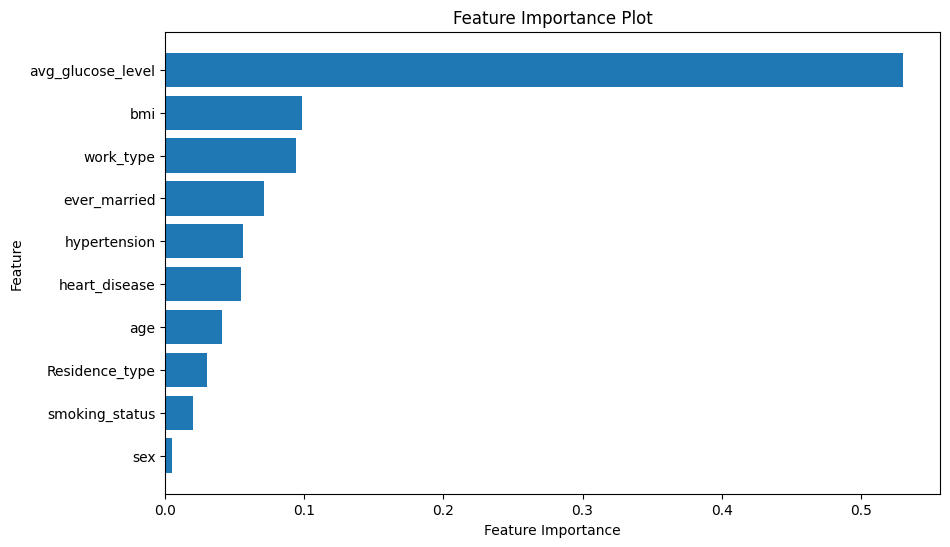

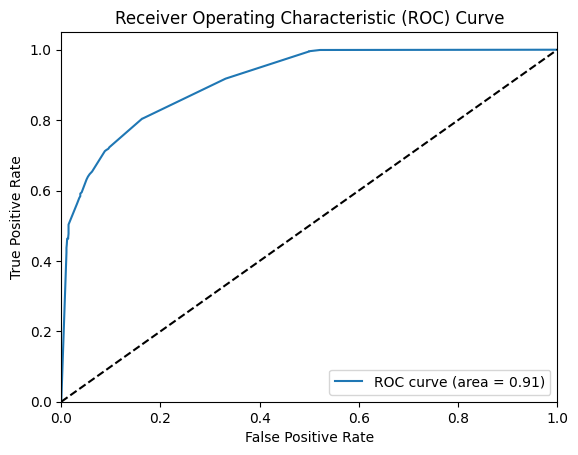

AUC Score: 0.912453150754406


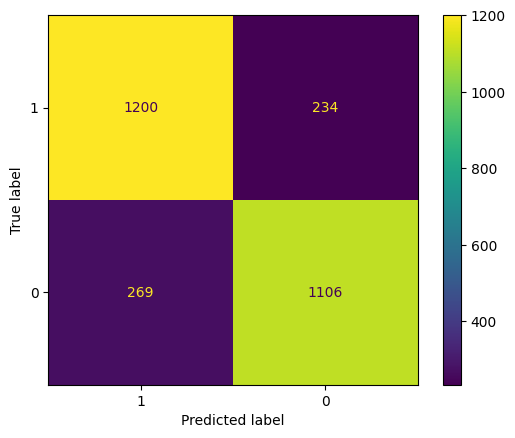

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8220640569395018, 0.8540925266903915, 0.8291814946619217, 0.8113879003558719, 0.8078291814946619, 0.7864768683274022, 0.8113879003558719, 0.8256227758007118, 0.8078291814946619, 0.875]
Mean accuracy: 0.8230871886120997
95% confidence interval: (0.8049576562529395, 0.84121672097126)


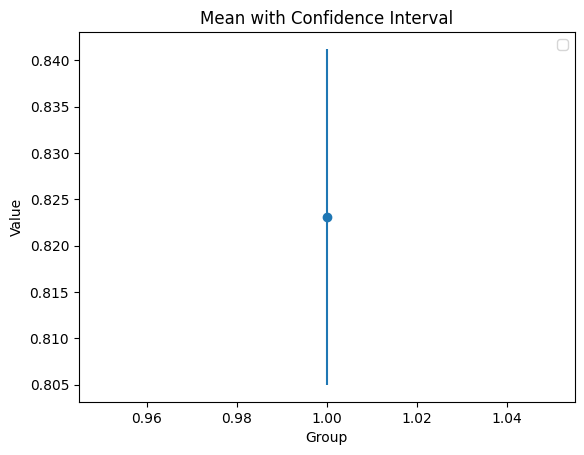

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_clean)
mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1434
           1       0.84      0.87      0.85      1375

    accuracy                           0.85      2809
   macro avg       0.85      0.85      0.85      2809
weighted avg       0.85      0.85      0.85      2809



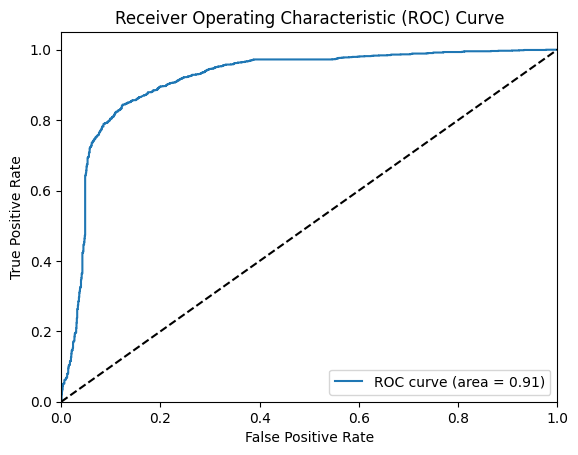

AUC Score: 0.9137344998098134


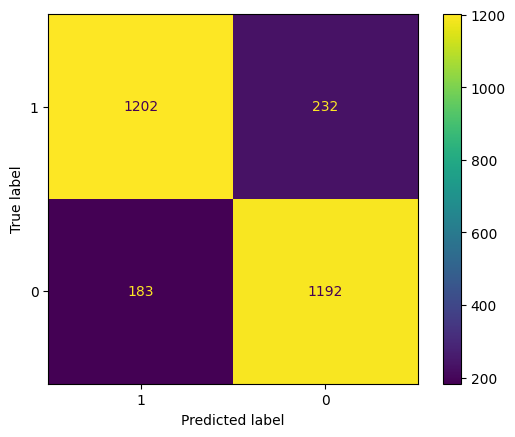

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8220640569395018, 0.7686832740213523, 0.7722419928825622, 0.7615658362989324, 0.7437722419928826, 0.800711743772242, 0.7473309608540926, 0.7935943060498221, 0.7864768683274022, 0.7892857142857143]
Mean accuracy: 0.7785726995424505
95% confidence interval: (0.7610521195160922, 0.7960932795688087)


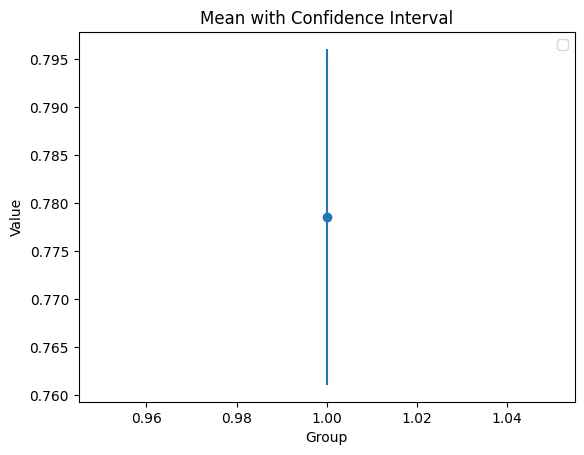

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_clean)
mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi = ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

# Categorical

In [32]:
df = df_clean.copy()

--------------------------------------
Value counts:
work_type
4    5833
3    2123
2    1265
1     122
0      20
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


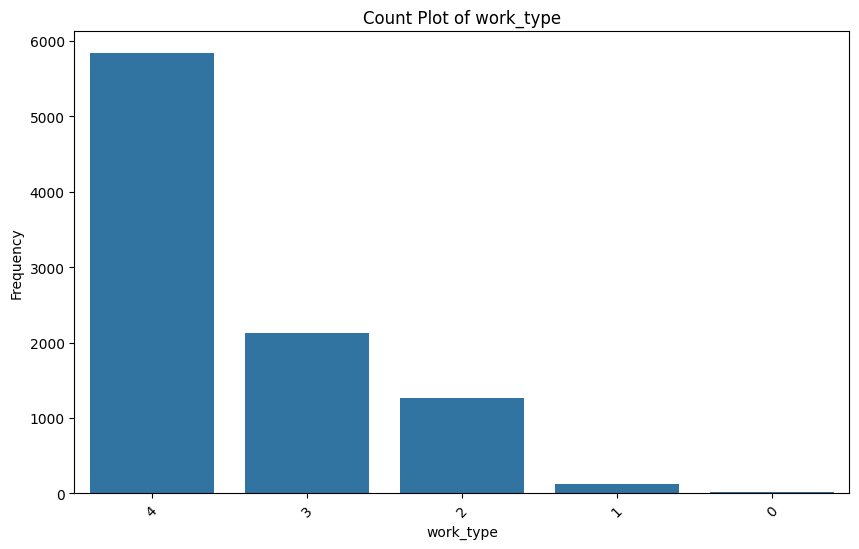

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 30, df)

Least frequent value:  0


Value counts:
work_type
4    4068
0    2821
3    1480
2     913
1      81
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


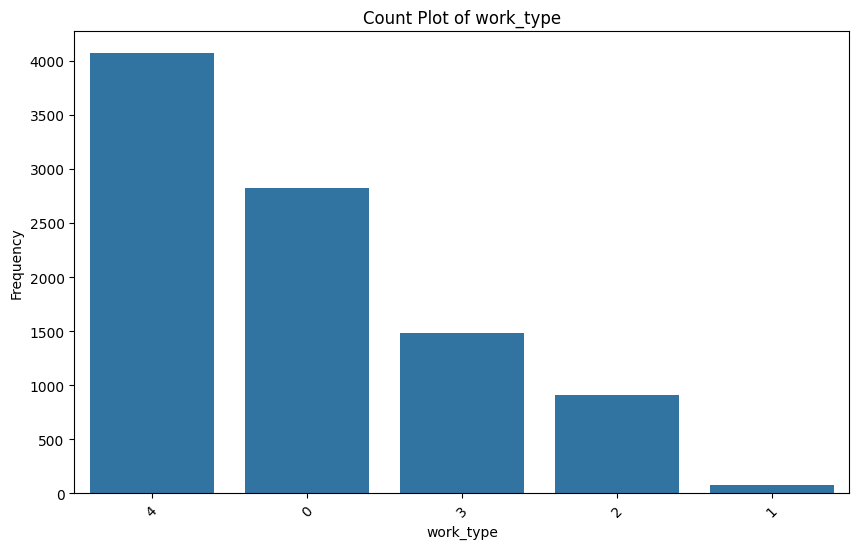

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.83      0.82      0.82      2809
weighted avg       0.83      0.82      0.82      2809

Node Labels:
 Annotation(0.651132, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


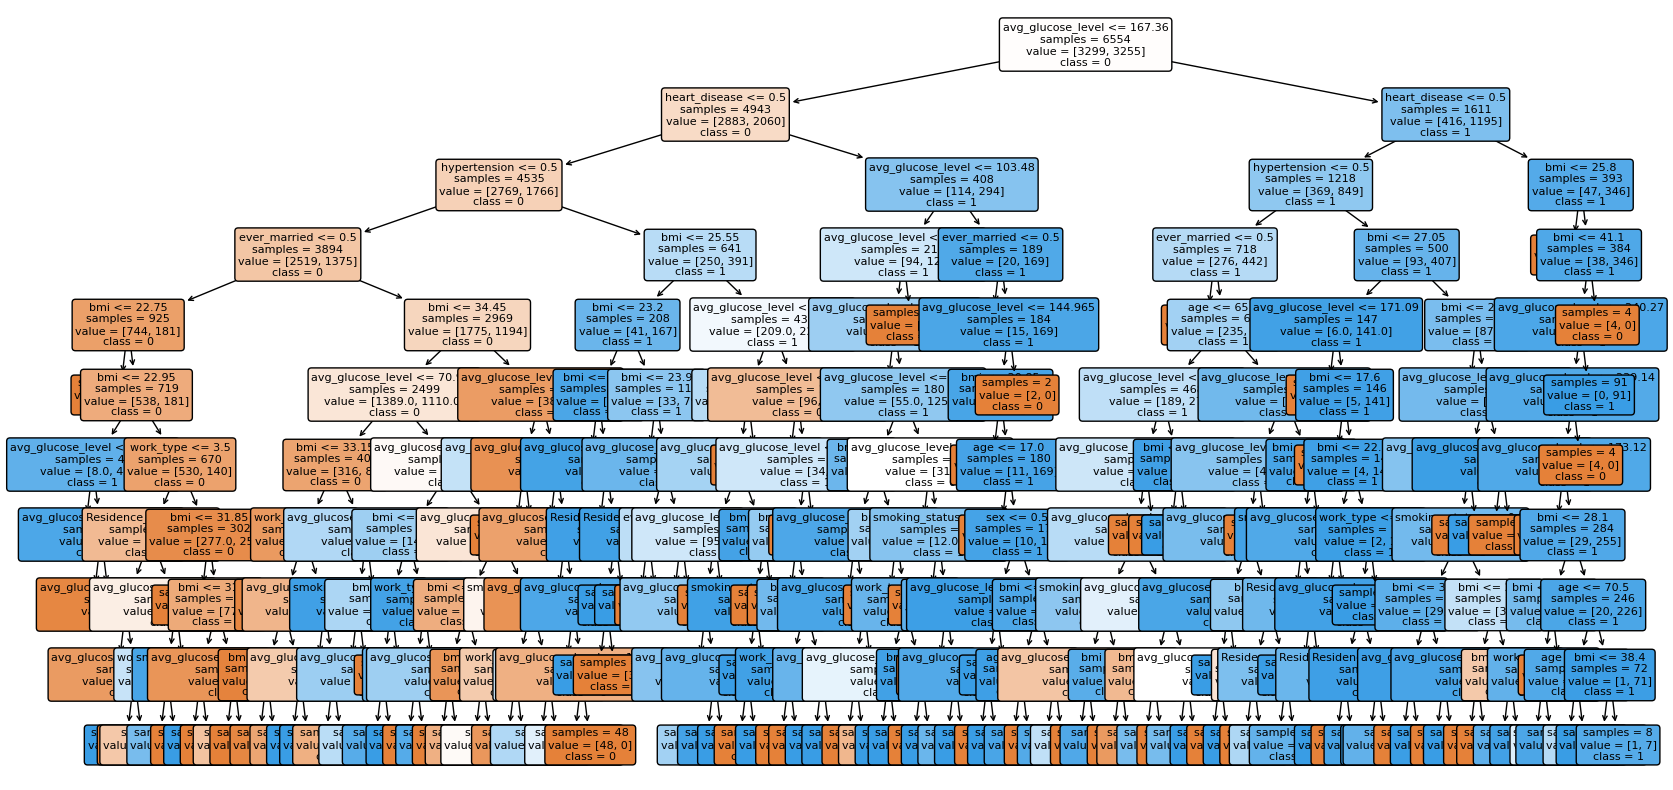

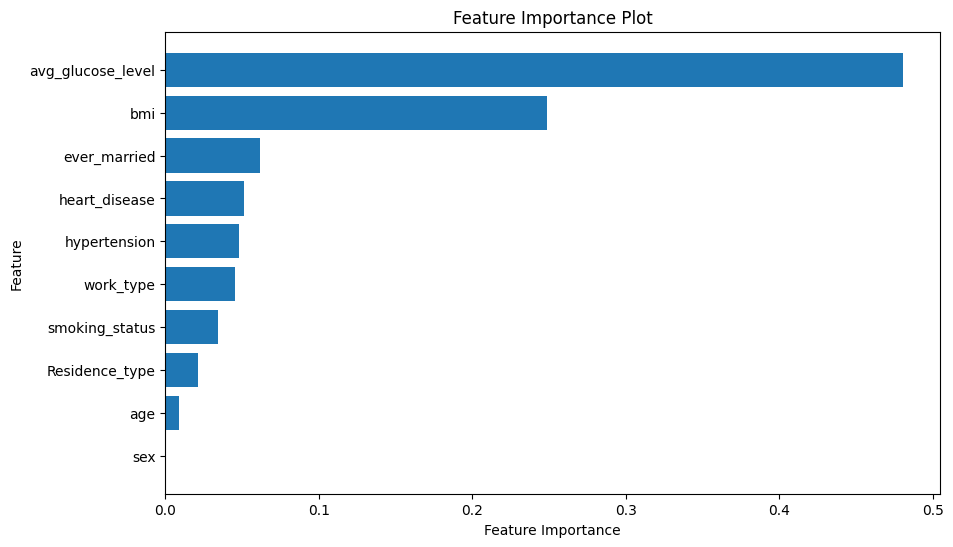

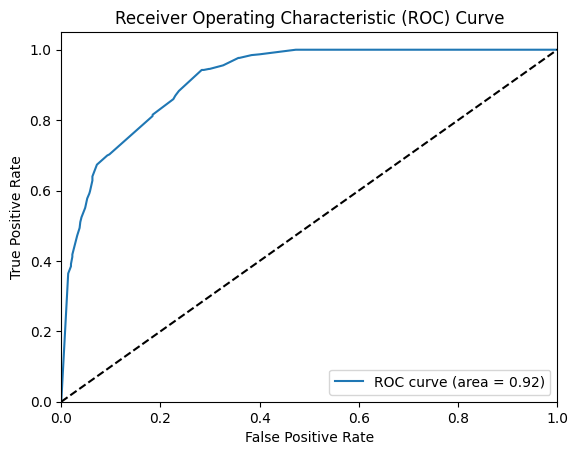

AUC Score: 0.9153657918093066


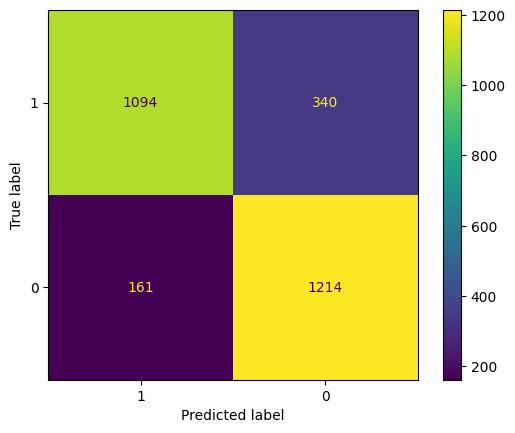

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8185053380782918, 0.8469750889679716, 0.8185053380782918, 0.7580071174377224, 0.797153024911032, 0.8718861209964412, 0.797153024911032, 0.8327402135231317, 0.7722419928825622, 0.8857142857142857]
Mean accuracy: 0.8198881545500762
95% confidence interval: (0.7906130850955514, 0.8491632240046011)


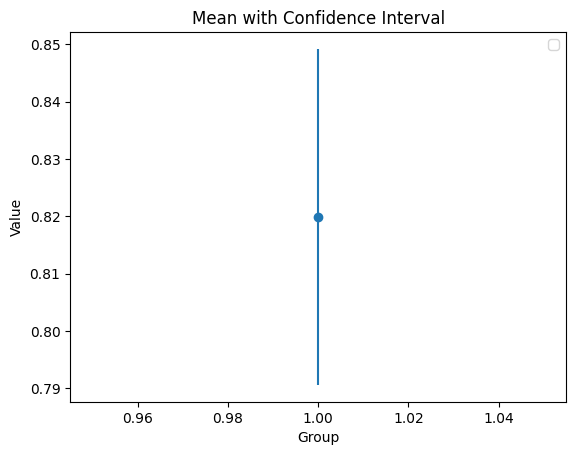

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, decision_tree = ML_algorithms.model_dt(df_categorical, df_clean)
mean_accuracy_dt_categorical, confidence_interval_dt_categorical = ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1434
           1       0.77      0.86      0.81      1375

    accuracy                           0.81      2809
   macro avg       0.81      0.81      0.81      2809
weighted avg       0.81      0.81      0.81      2809



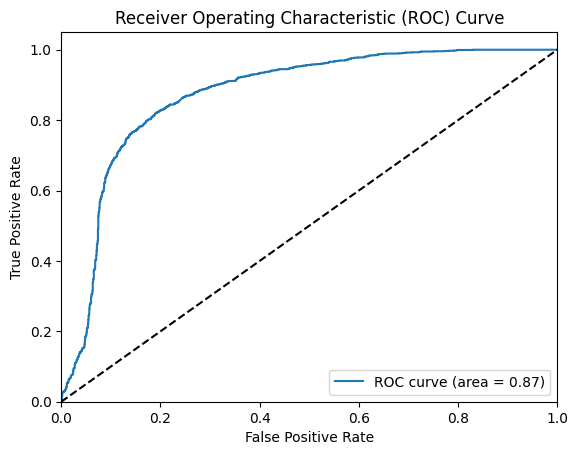

AUC Score: 0.8717170026626093


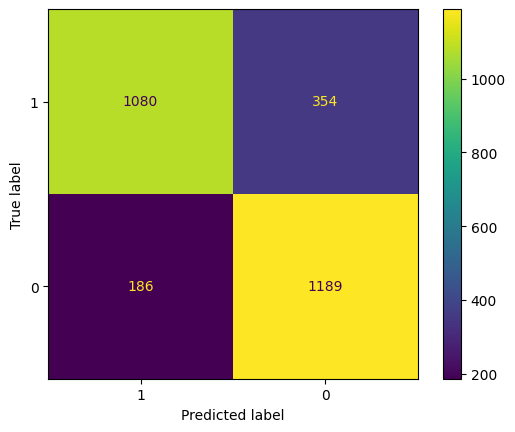

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8220640569395018, 0.8256227758007118, 0.7935943060498221, 0.7259786476868327, 0.8078291814946619, 0.7295373665480427, 0.7829181494661922, 0.7295373665480427, 0.7402135231316725, 0.8178571428571428]
Mean accuracy: 0.7775152516522623
95% confidence interval: (0.7475571999438071, 0.8074733033607175)


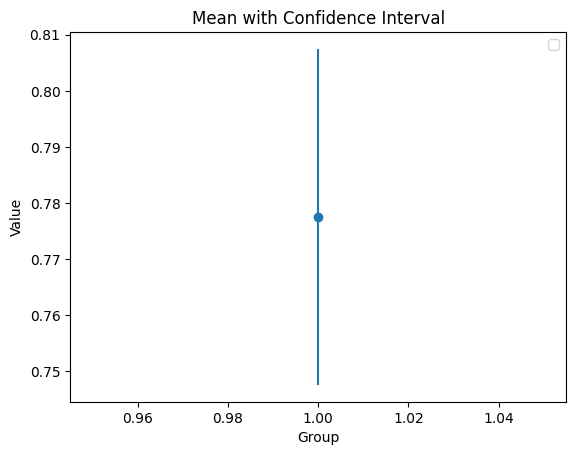

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, svm = ML_algorithms.model_svm(df_categorical, df_clean)
mean_accuracy_svm_categorical, confidence_interval_svm_categorical = ML_algorithms.k_fold_cross_validation_dt(svm,df_clean)

print('--------------------------------------')

## Conclusion

### ROC Curve

**Decision Tree**

Decision Tree


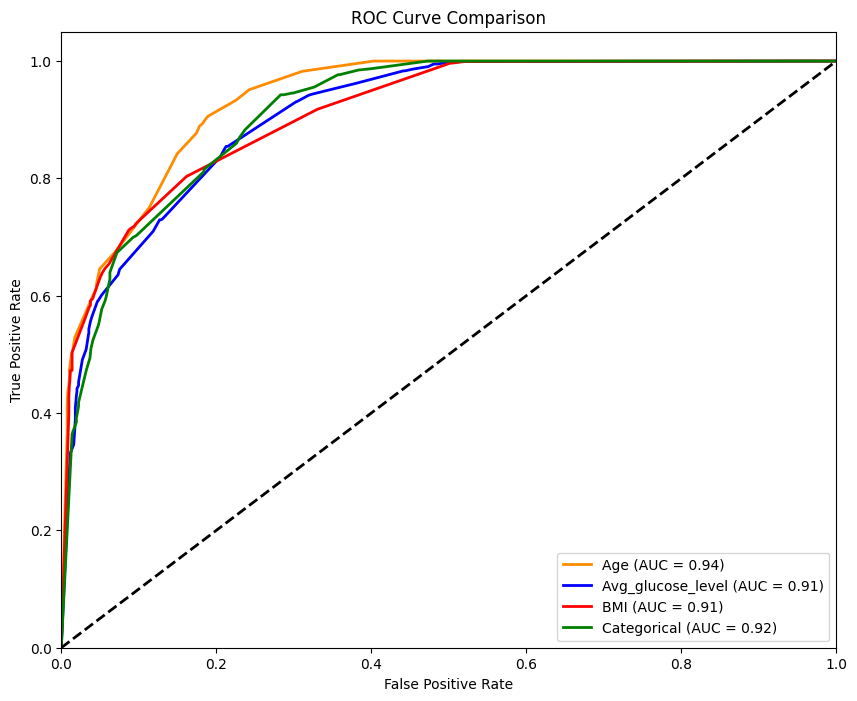

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

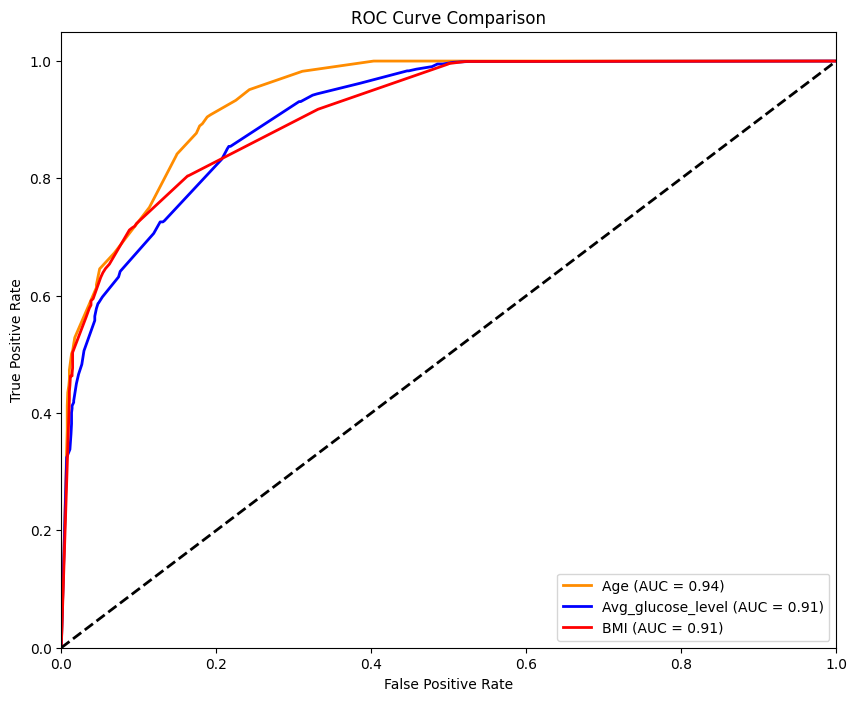

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

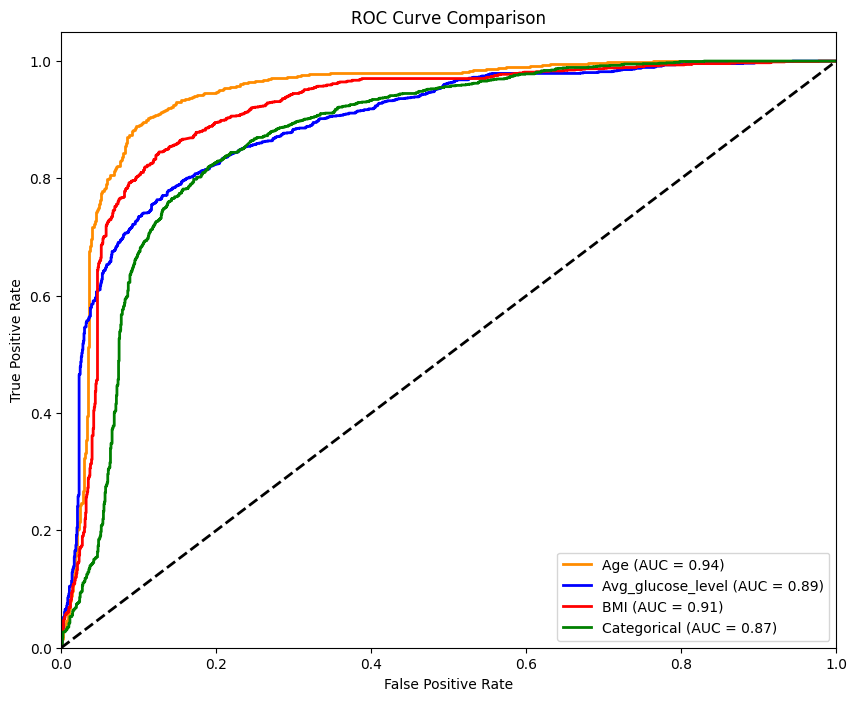

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

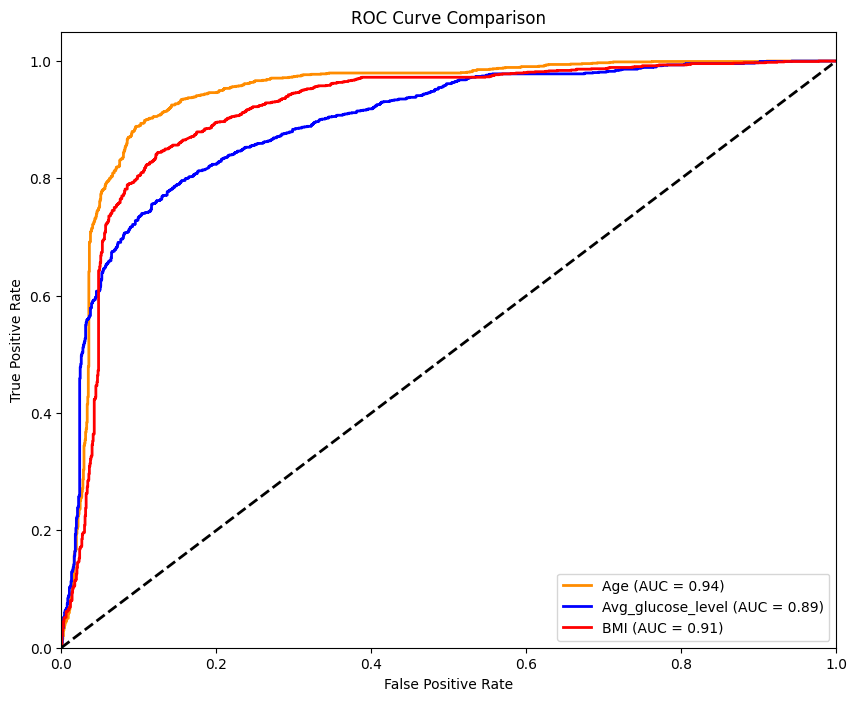

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidential Interval

**Decision Tree**

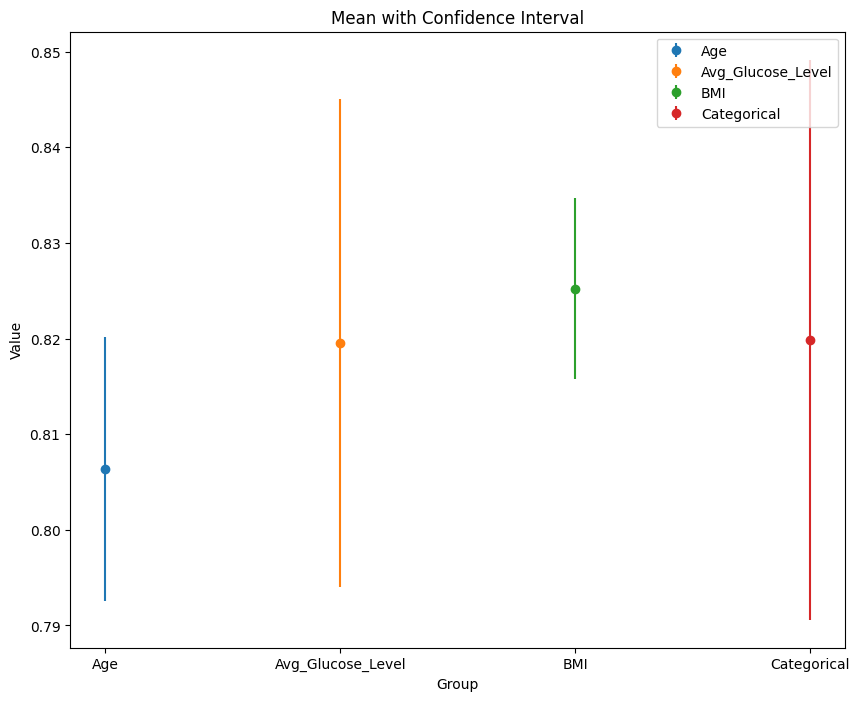

In [42]:
model_results = [
    ('Age', mean_accuracy_dt_age, confidence_interval_dt_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_glucose, confidence_interval_dt_glucose),
    ('BMI', mean_accuracy_dt_bmi, confidence_interval_dt_bmi),
    ('Categorical', mean_accuracy_dt_categorical, confidence_interval_dt_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Decision Tree - substitution of outliers**

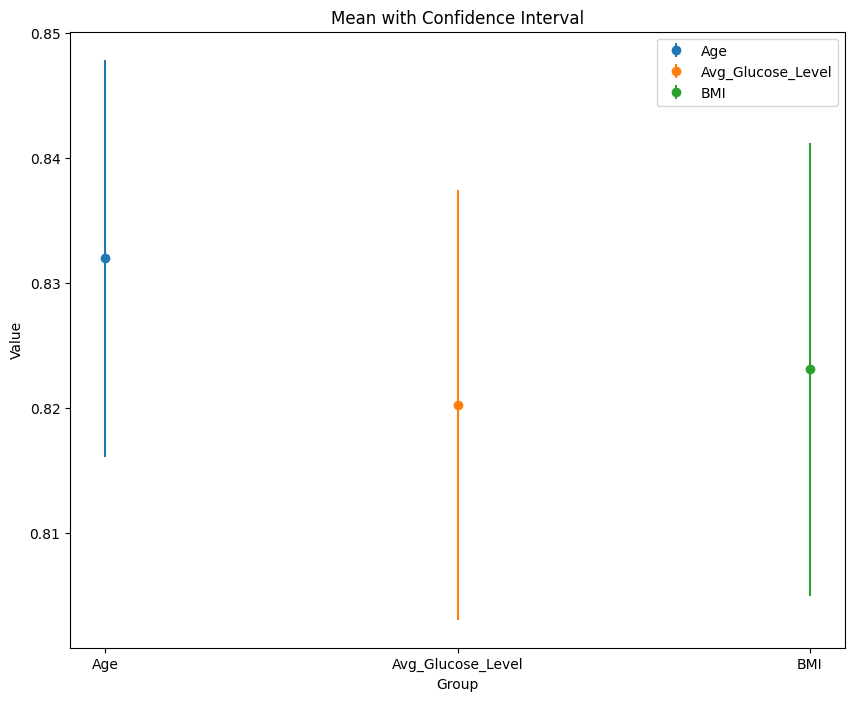

In [43]:
model_results = [
    ('Age', mean_accuracy_dt_20_age, confidence_interval_dt_20_age),
    ('Avg_Glucose_Level', mean_accuracy_dt_20_glucose, confidence_interval_dt_20_glucose),
    ('BMI', mean_accuracy_dt_20_bmi, confidence_interval_dt_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine**

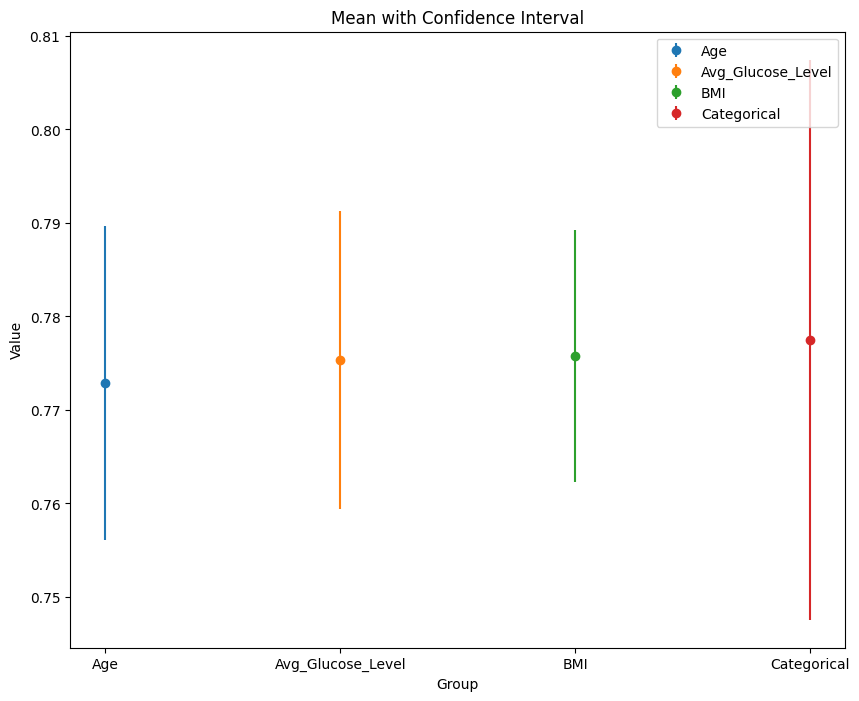

In [44]:
model_results = [
    ('Age', mean_accuracy_svm_age, confidence_interval_svm_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_glucose, confidence_interval_svm_glucose),
    ('BMI', mean_accuracy_svm_bmi, confidence_interval_svm_bmi),
    ('Categorical', mean_accuracy_svm_categorical, confidence_interval_svm_categorical)
]
ML_algorithms.plot_confidence_intervals(model_results)

**Support Vector Machine - substitution of outliers**

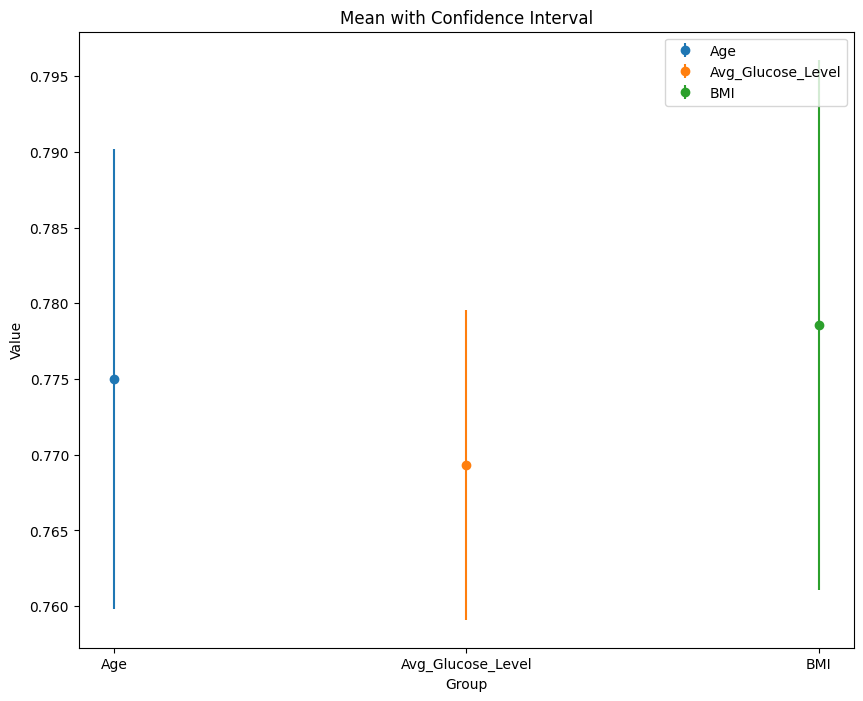

In [45]:
model_results = [
    ('Age', mean_accuracy_svm_20_age, confidence_interval_svm_20_age),
    ('Avg_Glucose_Level', mean_accuracy_svm_20_glucose, confidence_interval_svm_20_glucose),
    ('BMI', mean_accuracy_svm_20_bmi, confidence_interval_svm_20_bmi)
]
ML_algorithms.plot_confidence_intervals(model_results)